# STARBUCKS

# 프로젝트 개요

## INDEX

   * **데이터 탐색**
   * **데이터 전처리**
   * **데이터 분석 및 시각화**
   * **분석 결론**
   * **가설 검정**
   * **최종 결론**


## 팀원 소개

| 팀원 | 담당 역할|
|------|----------|
|이종원[팀장] |데이터 전처리, 데이터 분석, 보고서 작성|
|김도환|데이터 전처리, 데이터 시각화|
|성호경|데이터 시각화, 가설검정, PPT 제작|
|이현우|데이터 분석, 가설검정, 발표|
|오승훈|데이터 전처리, 데이터 분석, PPT 제작|

## 데이터 소개

* **출처** : 캐글 데이터 - Starbucks Customer Data. 
    - https://www.kaggle.com/ihormuliar/starbucks-customer-data 
    
![kaggle](./image/kaggle.PNG)


## 분석 방향

### 주제 : 스타벅스 고객의 특성 파악과 향후 프로모션 전략에 대한 제안

#### 스타벅스 고객의 특성 
   * **1. 스타벅스 가입 고객들의 특성**

#### 향후 프로모션 전략 제안
   * **1. 총 순 수익 관점에서 우수한 프로모션을 파악하고 향후 프로모션 전략에 반영**
      * ex) 예상 결론 : 현재 이러이러한 프로모션 전략이 총 순 수익 관점에서 우수하니. 앞으로 이런 프로모션을 자주 진행하자.
<br><br>
   * **2. 주력 고객층을 확보하기 위한 프로모션 전략 제안**
      * ex) 예상 결론 : 총 소비금액이 큰 `주력 고객층`이 자주참여 하는 프로모션 전략은 (~~ 이러이러) 하니. 주력 고객층을 확보하기 위해서는 ~ 이런 프로모션 전략을 취해야 한다. 
<br><br>
   * **3. 신규 고객층을 확보하기 위한 프로모션 전략 제안**
       * ex) 신규 고객 일수록 거래 빈도와 프로모션 참여 비율이 높은 결과가 나왔다. 신규 고객들이 선호하는 프로모션 전략을 파악하고 앞으로 그 프로모션을 취하자.

# 데이터 탐색

## 필요 라이브러리 로드 및 환경 설정

### 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime

### 환경 설정

In [2]:
# 그래프 스타일(seaborn-whitegrid)
plt.style.use('seaborn-whitegrid')

# 폰트설정, 마이너스 폰트 설정
plt.rc('font', family= "Malgun Gothic")
plt.rc('axes', unicode_minus=False)

# 모든 열을 다 보이게 하는 설정
pd.set_option('max_columns', None)

## 데이터 로드

In [3]:
profile = pd.read_csv('original_csv/profile.csv')
portfolio = pd.read_csv('original_csv/portfolio.csv')
transcript = pd.read_csv('original_csv/transcript.csv')

## profile.csv 데이터 탐색

* Dimensional data about each person, including their age, salary, and gender. There is one unique customer for each record.

|열 이름 | 의미| 특징|
|--------|-----|----|
| ***gender*** | 성별|  2175개의 결측치 |
|***age*** | 나이 | 2175개의 결측치 |
|***id*** | 아이디(고객 고유번호)| 17000명|
|***become_member_on*** | 어플 계정을 만든 날짜|2013/7/29 ~ 2018/7/26|
|***income*** | 수입|2175개의 결측치|

* **특징**
    * ***특징1*** : ***2175개의 결측치***가 존재하고, id, age(118:NA), income이 ***동시에 결측***됨.<br><br>
    * ***특징 2*** : gender 3개, income 값의 분포가 생각보다 적었다. 91개
    * ***특징 3*** : ***[gender]*** 결측치를 제외한 gender는, F, M, O 3개로 나뉨.
        - M : 8484 명, F : 6129 명, O : 212 명, nan : 2175명
            + O는 성소수자로 편입.
    * ***특징 4*** : **[age]**  평균 나이 : 54.4 세, 최대 : 101세, 최소 18세
    * ***특징 5*** : **[age]**  50대가 1등 ~ 10등 차지
    * ***특징 6*** :**[became_member_on]** 2013/7/29 ~ 2018/7/26일 까지.
    * ***특징 7*** :**[became_member_on]** 신규 어플 계정 가입자수가 크게 감소함.
    * ***특징 8*** :**[id]** 테이블의 key 값으로 17000명의 고객이 재 .
    * ***특징 9*** :**[income]**  수입의 분포가 91개로 그렇게 크지 않다. (측정치 14825개, 결측치는 2175개)
    * ***특징 10*** :**[income]**  평균 65404, 최소 30000, 최대 120000

----------------------------------------
### 전체적으로 살펴보기

In [4]:
display(profile.head())
display(profile.tail())

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


,Unnamed: 0,gender,age,id,became_member_on,income
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0
16999,16999,F,62,e4052622e5ba45a8b96b59aba68cf068,20170722,82000.0


**특징1** : **2175개의 결측치**가 존재하고, gender, age(118:NA), income이 **동시에 결측**됨
  - (번호표시) 데이터 전처리 과정에서 **데이터 삭제**. 전체 데이터의 약 13%정도(계산다시)

In [5]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [6]:
profile[profile['age']==118]

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...,...
16980,16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


***특징 2*** : gender 3개, income 값의 분포가 생각보다 적었다. 91개

In [7]:
profile.nunique()

Unnamed: 0          17000
gender                  3
age                    85
id                  17000
became_member_on     1716
income                 91
dtype: int64

--------------------------------
### gender : 고객 성별

* ***특징 3*** : 결측치를 제외한 gender는, F, M, O 3개로 나뉨. 
    - `M` : 8484 명, `F` : 6129 명, `O` : 212 명, nan : 2175명
    - `O` :를 제 3의 성별로 인식하기로 함.

gender : [nan 'F' 'M' 'O']
M    8484
F    6129
1    2175
O     212
Name: gender, dtype: int64


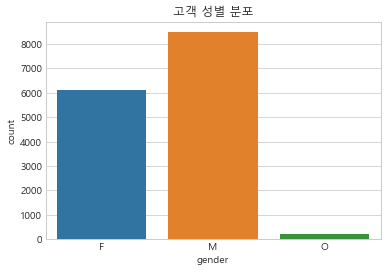

In [8]:
print('gender :', profile['gender'].unique())
print(profile['gender'].fillna(1).value_counts())
sns.countplot(data=profile, x='gender').set_title('고객 성별 분포');

---------------------------------------
### age : 고객 나이
* ***특징 4*** : 평균 나이 : 54.4 세, 최대 : 101세, 최소 18세, 결측치 118세
* ***특징 5*** : 50대가 1등 ~ 10등 차지

In [9]:
# 결측치 제거 데이터
age = profile[profile['age']!=118]

In [10]:
print('기술통계값',age['age'].describe(), sep='\n') 
profile['age'].value_counts().head(10)

기술통계값
count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


118    2175
58      408
53      372
51      363
54      359
59      359
57      353
52      351
55      350
56      342
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

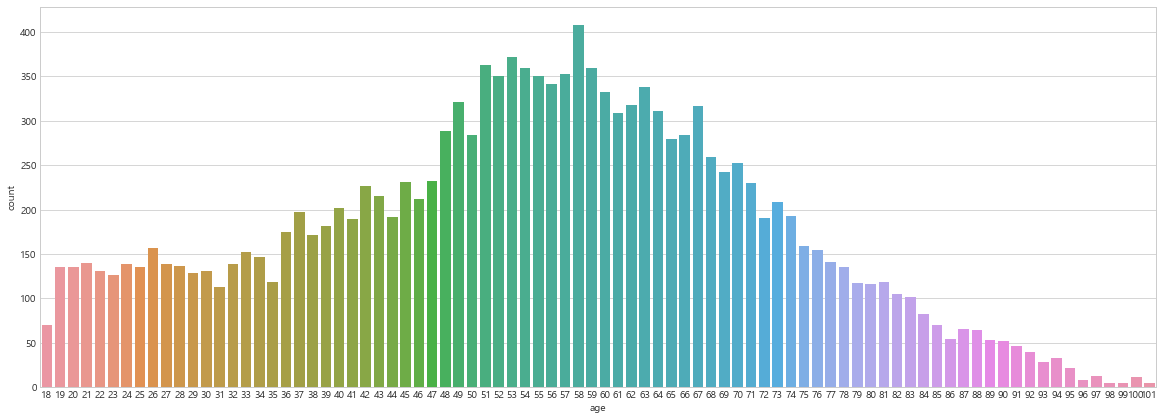

In [11]:
plt.figure(figsize=(20, 7))
sns.countplot(data=age, x='age')

---------------------------------------
### became_member_on : 어플 계정을 만든 날짜
* ***특징 6*** : 2013/7/29 ~ 2018/7/26일 까지.
* ***특징 7*** : 신규 어플 계정 가입자수가 크게 감소함.

In [12]:
profile['became_member_on']=pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

In [13]:
profile['became_member_on'].describe()

<ipython-input-13-406b1a2d7433>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  profile['became_member_on'].describe()


count                   17000
unique                   1716
top       2017-12-07 00:00:00
freq                       43
first     2013-07-29 00:00:00
last      2018-07-26 00:00:00
Name: became_member_on, dtype: object

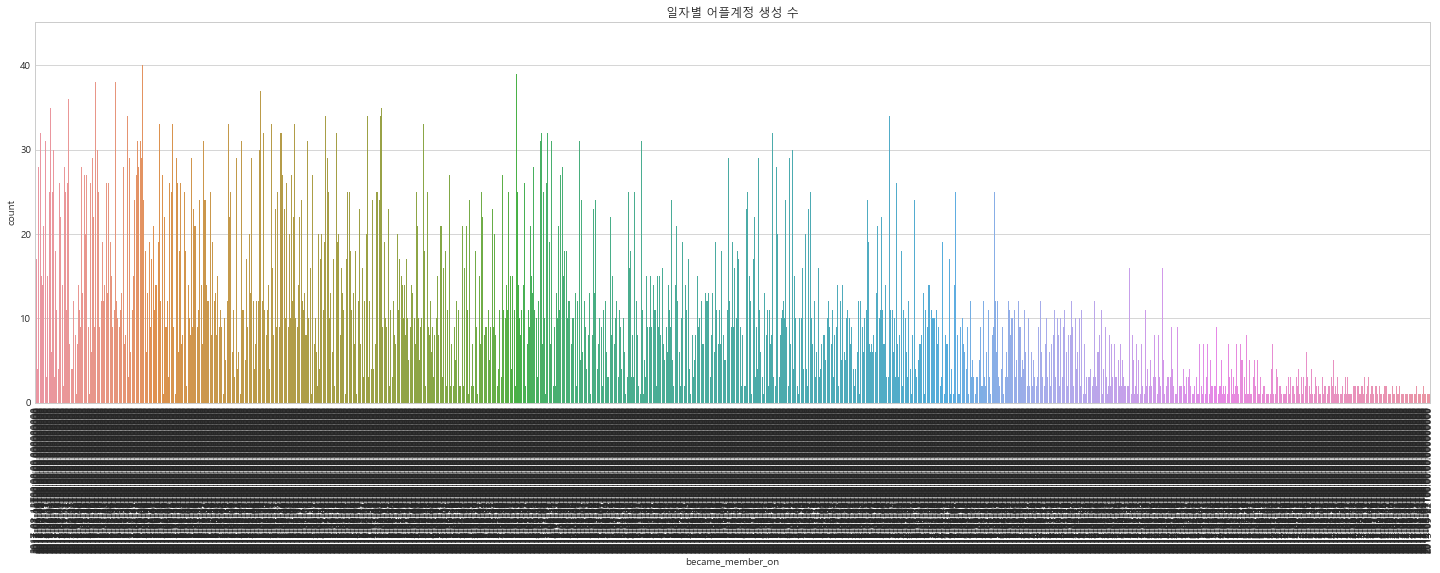

In [14]:
plt.figure(figsize=(25, 7))
plt.xticks(rotation=90)  
sns.countplot(data=profile, x='became_member_on').set_title('일자별 어플계정 생성 수');

---------------------------------------
### id : 고객 아이디

* ***특징 8*** : 테이블의 key 값으로 17000명의 고객이 존재.
  - 비 직관적인 데이터 -> 중복을 허용하지 않는 선[10 자리]로 자른다.

---------------------------------------
### income : 고객 수입

* ***특징 8*** : 수입의 분포가 91개로 그렇게 크지 않다. (측정치 14825개, 결측치는 2175개)
* ***특징 9*** : 평균 65404, 최소 30000, 최대 120000

In [25]:
print(profile['income'].isnull().value_counts())
profile['income'].describe()

False    14825
True      2175
Name: income, dtype: int64


count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

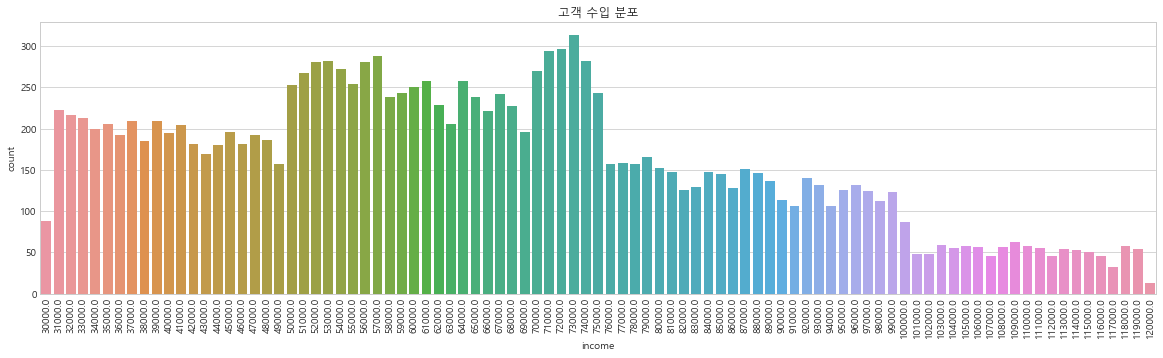

In [26]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation =90)
sns.countplot(data=profile, x='income').set_title('고객 수입 분포');

----------------------------------------
## portfolio.csv 데이터 탐색

* Information about the promotional offers that are possible to receive, and basic information about each one including the promotional type, duration of the promotion, reward, and how the promotion was distributed to customers
* 홍보제안이 제공될 수 있는 정보와 홍보유형, 홍보기간, 보상, 고객에게 홍보가 어떻게 배포되었는지를 포함한 각 홍보제안의 기본정보

|열 이름 | 의미| 특징|
|--------|-----|----|
|<span style="color:red">***reward***</span>| 쿠폰 사용 금액(달러) |  bogo(1+1)의 reward는 difficulty와 같다.|
|***channel*** | 홍보가 어떤 수단을 통해 배포되었는가 | web, email, mobile, social|
|<span style="color:red">***difficulty***</span>|쿠폰을 받기 위한 최소 금액(달러)|There is also a difficulty score, the dollar amount that must be spent for the offer to be completed.|
|***duration*** | UNKOWN, 이벤트 진행기간 |
|***offer_type*** | 프로모션 유형|Bogo : 보고 쿠폰(Buy One Get One) 1+1 쿠폰, Informational : 정보제공, Discount : 할인|
| ***id***|프로모션 id ||

* **특징**
   * **특징1** : **[id]** id 값이 비 직관적이다. 전처리시, 10자리로 자른다.
   * **특징2** : **[offer_type]** 정보성 프로모션(offer_type : informational)은 difficulty가 0이다.
   * **특징3** : **[channels]** 홍보수단(channels)이 list로 묶여 있다. 이를 풀어줘야 한다.


In [27]:
portfolio

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


----------------------------------------
## Transcript.csv 데이터 탐색

* Records show the different steps of promotional offers that a customer received. The different values of receiving a promotion are receiving, viewing, and completing. You also see the different transactions that a person made in the time since he became a customer. With all records, you see the day that they interacted with Starbucks and the amount that it is worth.

|열 이름 | 의미| 특징|
|--------|-----|----|
| ***person*** | 고객 id |  |
|***event*** | 진행</span>상황(record) : transaction, offer viewed, offer received,  offer completed| |
|***value*** |프로모션 id, 거래금액(transaction amount)|`{key : value}` 형태로 존재 |
|***time***| time in hours| |

* **특징**
    * ***특징 1*** :**[person]**  결측치가 없다, 17000명의 고객의 정보가 있다. 한 고객은 한번 이상의 거래(프로모션 참여) 기록을 가지고 있다. 
    * ***특징 2*** :**[person]** 한 고객의 프로모션 참여 빈도 최대 51회, 최소1회, 평균 18회, 중앙값 17회 
    * ***특징 3*** : **[event]** `offer received`(76277건), `offer viewed`(57725건), `offer completed`(33579건), `transaction`(138953건) 값만 존재.
    * ***특징 4*** : **[event]** 'transaction'은 **[value]**의 key값이 amount이다. 나머지는 프로모션 id와 연관
    * ***특징 5*** : **[event]** `{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}`를 portfoio와 비교해보니 reward개수가 같았다.

---------------------------------------
### 전체적으로 살펴보기

In [28]:
display(transcript.head())
display(transcript.tail())
transcript.info()
transcript.nunique()

,Unnamed: 0,person,event,value,time,Unnamed: 5,Unnamed: 6
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN,NaN
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN,NaN
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN,NaN
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,NaN,NaN
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,NaN,NaN


,Unnamed: 0,person,event,value,time,Unnamed: 5,Unnamed: 6
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,NaN,NaN
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,NaN,NaN
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,NaN,NaN
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,NaN,NaN
306533,306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  306534 non-null  int64  
 1   person      306534 non-null  object 
 2   event       306534 non-null  object 
 3   value       306534 non-null  object 
 4   time        306534 non-null  int64  
 5   Unnamed: 5  0 non-null       float64
 6   Unnamed: 6  280415 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 16.4+ MB


Unnamed: 0    306534
person         17000
event              4
value           5121
time             120
Unnamed: 5         0
Unnamed: 6       115
dtype: int64

---------------------------------------
### person : 고객 id


* ***특징 1*** :**[person]**  결측치가 없다, 17000명의 고객의 정보가 있다. 한 고객은 한번 이상의 거래(프로모션 참여) 기록을 가지고 있다. 
* ***특징 2*** :**[person]** 한 고객의 프로모션 참여 빈도 최대 51회, 최소1회, 평균 18회, 중앙값 17회

In [29]:
len(transcript['person'].unique())

17000

In [30]:
print('max', transcript['person'].value_counts().max())
print('min', transcript['person'].value_counts().min())
print('mean', transcript['person'].value_counts().mean())
print('median', transcript['person'].value_counts().median())

max 51
min 1
mean 18.031411764705883
median 17.0


---------------------------------------
### event : 진행상황, 거래, 이벤트 제안 수신, 이벤트 조회, 이벤트 완판


* ***특징 3*** : **[event]** `offer received`(76277건), `offer viewed`(57725건), `offer completed`(33579건), `transaction`(138953건) 값만 존재.

In [31]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64


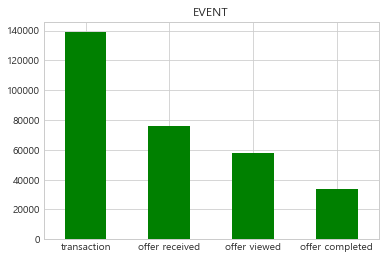

In [32]:
print(transcript['event'].value_counts())
transcript['event'].value_counts().plot.bar(rot=0, color='g', title='EVENT');

* ***특징 4*** : **[event]** 'transaction'은 **[value]**의 key값이 amount이다. 나머지는 프로모션 id와 연관
<br><br>
* ***특징 5*** : **[event]** key값이 'offer id'인 부분을 value만 따로 뽑아서 **portfolio.csv**의 **[id]**와 조인하면 더 많은 내용을 분석할 수 있을거 같다.

In [33]:
display(transcript[transcript['event']=='transaction'].sample(6))
display(transcript[transcript['event']=='offer received'].sample(6))
display(transcript[transcript['event']=='offer viewed'].sample(6))
display(transcript[transcript['event']=='offer completed'].sample(6))

,Unnamed: 0,person,event,value,time,Unnamed: 5,Unnamed: 6
79326,79326,78506ec87c8a40eea0520907e21d7cb5,transaction,{'amount': 17.56},192,NaN,8.00
71084,71084,99cb2a9c95ef4f14999129b4dd56472e,transaction,{'amount': 3.12},174,NaN,7.25
186162,186162,b4329be002644c02b73cb029294c70b0,transaction,{'amount': 1.81},450,NaN,18.75
285947,285947,e6590c7f954f4ff482c069b45070b351,transaction,{'amount': 3.63},636,NaN,26.50
146712,146712,5a2ee75088994187bed4cb8404acb54a,transaction,{'amount': 6.75},390,NaN,16.25
271377,271377,2a0bd0b90c2a451c904b11c543c920a8,transaction,{'amount': 4.11},594,NaN,24.75


,Unnamed: 0,person,event,value,time,Unnamed: 5,Unnamed: 6
157111,157111,b447ba6643bb49a585413cae3fb30a3f,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},408,NaN,17.0
206289,206289,7833bbd264454be68861e014745a8982,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},504,NaN,21.0
205093,205093,adad1a68bb674945ba10b71b3fd01592,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},504,NaN,21.0
120554,120554,3145b269f33640d7902251129a46f9f7,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},336,NaN,14.0
155728,155728,9ea228a4b3f640c985cc123dbf59b8e4,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},408,NaN,17.0
122081,122081,eef5ea58662f4e27b591d39990c10ae2,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},336,NaN,14.0


,Unnamed: 0,person,event,value,time,Unnamed: 5,Unnamed: 6
214793,214793,45894d525a1240919347e335d25d76a8,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,NaN,21.00
130116,130116,a225189b10a141d5bb1ff0a05265da4c,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},342,NaN,14.25
261512,261512,fb2473731d2047ceb4ec69e6ccacbb32,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},576,NaN,24.00
166100,166100,36f8574d192946a1a68dd0c666fce6e4,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408,NaN,17.00
22880,22880,54b38aa97c7f4ce8829830725f67f167,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},24,NaN,NaN
91134,91134,de6d949f1af74cd9b7176543a579a61d,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},234,NaN,9.75


,Unnamed: 0,person,event,value,time,Unnamed: 5,Unnamed: 6
215975,167333,598bd781d2a242b6be006823cd161ca8,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,408,NaN,17.00
294557,36733,f420b079ba0e4ba688dadfa617332fea,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,72,NaN,3.00
270721,84319,f0ef63b28f2540fe811b8d9935ec61f5,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,210,NaN,8.75
196646,171731,c6c1259f6fbc4e6c82a7b9dd3c83f636,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,420,NaN,17.50
85131,271244,d61124b6a76847b593f8fce78484fcce,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,594,NaN,24.75
40227,290699,88039391f4304a0a9cc2ce1f64b92eb4,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,648,NaN,27.00


### value : 프로모션 ID, 트랜잭션 금액

* ***특징 4*** : **[event]** 'transaction'은 **[value]**의 key값이 amount이다. 나머지는 프로모션 id와 연관
* ***특징 6*** : **[value]** `{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}`를 portfoio와 비교해보니 reward개수가 같았다.
    - key값은 'offer_id', 'offer id', 'amount' 이렇게 3개가 존재한다.<br><br>

* <span style="color:red"> ***체크 포인트 8***</span> : **[value]**  전처리시 value값에 대하여 다음과 같이 처리
     - reward 부분 제거
     - key와 value를 분리한다.
     - amount 소수점 두자리로 변경

In [34]:
transcript

,Unnamed: 0,person,event,value,time,Unnamed: 5,Unnamed: 6
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN,NaN
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN,NaN
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN,NaN
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,NaN,NaN
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,NaN,NaN
...,...,...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,NaN,NaN
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,NaN,NaN
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,NaN,NaN
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,NaN,NaN


In [35]:
portfolio

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [36]:
transcript[transcript['event']!='transaction']['value'].value_counts()

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}                  14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}                  14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}                  14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}                  14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}                  14374
{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}                  14305
{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}                  11848
{'offer id': '3f207df678b143eea3cee63160fa8bed'}                  11761
{'offer id': '2906b810c7d4411798c6938adc9daaa5'}                  11750
{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}                  10331
{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}      5317
{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}      5156
{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}      4354
{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}   

### time : time in hours

+ Time in hours, The data begins at time(시점 0으로 부터 시작 기간). [2021/05/18]
+ Time을 하루 24시간으로 나누면 1일 ~ 30일이 나온다. 여기서  일주일 간격으로 peak를 찍는 모습을 보였다.
+ 데이터 전처리시 Time을 일별로 변환한 데이터의 컬럼을 추가해보자 
+ 데이터를 보면 6 단위로 증가함.

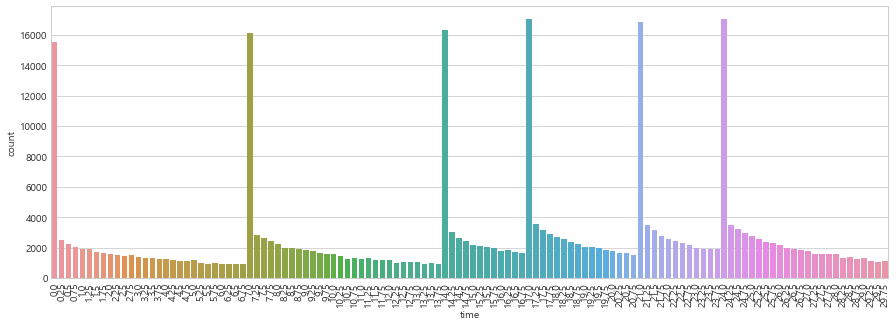

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(x = transcript['time']/24)
plt.xticks(rotation=90);

In [38]:
transcript.groupby(by= 'time')[['time']].count()

,time
time,
0,15561
6,2506
12,2215
18,2015
24,1921
...,...
690,1260
696,1326
702,1115


-------------------------------------------
# 데이터 전처리 

----------------------------------------
## profile.csv 전처리

|열 이름 | 의미| 특징|
|--------|-----|----|
| ***gender*** | 고객 성별|  2175개의 결측치 |
|***age*** | 고객 나이(bining필요) | 2175개의 결측치 |
|***id*** | 고객 아이디(고객 고유번호)| key값|
|***become_member_on*** | 어플 계정을 만든 날짜|
|***income*** | 고객 수입|2175개의 결측치|

In [39]:
# 지수표현 처리[profile의 income 부분이 지수로 표현되면 아래 실행]
# pd.options.display.float_format = '{:.1f}'.format

**데이터 깊은 복사 : profile_data**

In [40]:
profile_data = profile.copy()

-------------------------------------------
### 결측치 제거, Unnamed: 0 컬럼 제거
* **특징1** : **2175개의 결측치**가 존재하고, gender, age(118:NA), income이 **동시에 결측**됨
    - 2175개의 결측치 제거

In [41]:
profile_data = profile_data.dropna(axis=0)
del profile_data['Unnamed: 0']
print(profile_data.shape)

(14825, 5)


In [42]:
profile_data.head(2)

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0


-------------------------------------------
### gender 관련 전처리

+ 각각의 성별로 데이터를 모아서 변수로 생성한다.
    - 나중에 성별에 따른 데이터를 분석 가능

In [43]:
gender_m = profile_data[profile_data['gender'] == 'M']
gender_f = profile_data[profile_data['gender'] == 'F']
gender_o = profile_data[profile_data['gender'] == 'O']

In [44]:
print(gender_m.shape, gender_f.shape, gender_o.shape )

(8484, 5) (6129, 5) (212, 5)


-------------------------------------------
### age 관련 전처리

### [age_units10] 10을 간격으로 나눔
* 나이대별로 구간 나누기
   + 0세 ~ 19세 : '10'
   + 20세 ~ 29세 : '20'
   + 30세 ~ 39세 : '30'
   + 40세 ~ 49세 : '40'
   + 50세 ~ 59세 : '50'
   + 60세 ~ 69세 : '60'
   + 70세 ~ 79세 : '70'
   + 80세 ~ 89세 : '80'
   + 90세 ~ 99세 : '90'
   + 100세 ~ 117세 : '100'

In [45]:
profile_data['age_units10'] = pd.cut(x= profile_data['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 118], 
       labels=['10','20', '30', '40', '50', '60', '70', '80', '90', '100'], include_lowest = True, right=False)

In [46]:
# 정수형으로 변환
profile_data = profile_data.astype({'age_units10':'int'})
profile_data.sample(4)

,gender,age,id,became_member_on,income,age_units10
11283,F,65,3c08e4668bc34bda9f4ae4853defe255,2016-03-18,68000.0,60
5939,M,45,0964d4f3fa2344409e792c5ac6885a88,2018-05-06,72000.0,40
12892,F,37,ecc6f1cbb1ed41069d5d60461577250e,2016-11-07,52000.0,30
12516,M,30,b991ce65f2094154a29d1bc76abdd272,2016-09-10,40000.0,30


### [age_units5] 5을 간격으로 나눔

In [47]:
profile_data['age_units5'] = pd.cut(x= profile_data['age'], 
        bins=[0, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 118], 
       labels=['10','15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100'], 
                                     include_lowest = True, right=False)
# 정수형으로 변환
profile_data = profile_data.astype({'age_units5':'int'})
profile_data.sample(4)

,gender,age,id,became_member_on,income,age_units10,age_units5
2363,F,73,c7c44b6fe09945a0bdfb65e1f9807552,2017-10-10,78000.0,70,70
6000,F,58,e37db063f380473484acfb86046bf5b8,2016-09-21,75000.0,50,55
5974,F,74,95e5285e78ce43d7882cd5bcf14bc8a0,2017-07-01,84000.0,70,70
16580,M,50,d178bcf02f2640d0abfd6a720d8619ca,2018-05-14,62000.0,50,50


-------------------------------------------
### id 관련 전처리

#### id 값을 10자리로 축소
 + id 값이 불필요하게 너무 길다. 분석의 편리를 위해 중복되지 않는 선에서 10자리로 줄인다.
     - 줄인 후에도 14825개 데이터 유지

In [48]:
profile_data['id'] = profile_data['id'].str[:10]
display(profile_data.head(3))
profile_data['id'].nunique()

,gender,age,id,became_member_on,income,age_units10,age_units5
1,F,55,0610b48642,2017-07-15,112000.0,50,55
3,F,75,78afa99579,2017-05-09,100000.0,70,75
5,M,68,e2127556f4,2018-04-26,70000.0,60,65


14825

#### [person_id] transcript 와 join을 위해 id값 변경

In [49]:
profile_data = profile_data.rename({'id':'person_id'},axis='columns')
profile_data.head(2)

,gender,age,person_id,became_member_on,income,age_units10,age_units5
1,F,55,0610b48642,2017-07-15,112000.0,50,55
3,F,75,78afa99579,2017-05-09,100000.0,70,75


-------------------------------------------
### became_member_on 관련 전처리

#### [year], [month], [day] 컬럼 추가
 + 어플 가입 일자를 연(year), 월(month), 일(day)로 구분하여 데이터 분석을 확장시킨다.

In [50]:
profile_data['join_year'] = profile_data['became_member_on'].dt.year
profile_data['join_month'] = profile_data['became_member_on'].dt.month
profile_data['join_day'] = profile_data['became_member_on'].dt.day

In [51]:
profile_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   person_id         14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
 5   age_units10       14825 non-null  int32         
 6   age_units5        14825 non-null  int32         
 7   join_year         14825 non-null  int64         
 8   join_month        14825 non-null  int64         
 9   join_day          14825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4), object(2)
memory usage: 1.1+ MB


#### [now], [join_period]

 + 마지막일자(2021/06/01) 기준으로 어플 가입 일자 추가.

In [56]:
profile_data['now'] = datetime.date.today()
profile_data['now'] = pd.to_datetime(profile_data['now'])
profile_data['join_period'] = profile_data['now'] - profile_data["became_member_on"]
display(profile_data.head(3))

# [join_day]의 days 제거 
profile_data = profile_data.astype({'join_period':'str'})
profile_data['join_period'] = profile_data['join_period'].str[:4]

# 다시 정수형으로 변환
profile_data = profile_data.astype({'join_period':'int'})

# 결과 확인 
display(profile_data.head(3))
profile_data.dtypes

,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period
1,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472 days
3,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539 days
5,M,68,e2127556f4,2018-04-26,70000.0,60,65,2018,4,26,2021-07-26,1187 days


,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period
1,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472
3,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539
5,M,68,e2127556f4,2018-04-26,70000.0,60,65,2018,4,26,2021-07-26,1187


gender                      object
age                          int64
person_id                   object
became_member_on    datetime64[ns]
income                     float64
age_units10                  int32
age_units5                   int32
join_year                    int64
join_month                   int64
join_day                     int64
now                 datetime64[ns]
join_period                  int32
dtype: object

In [58]:
profile_data.to_csv("checkpoint_csv/profile_processing.csv", index = False)

In [59]:
df = pd.read_csv('checkpoint_csv/profile_processing.csv')
df[['person_id', 'became_member_on', 'join_year', 'join_month', 'join_day']]

,person_id,became_member_on,join_year,join_month,join_day
0,0610b48642,2017-07-15,2017,7,15
1,78afa99579,2017-05-09,2017,5,9
2,e2127556f4,2018-04-26,2018,4,26
3,389bc3fa69,2018-02-09,2018,2,9
4,2eeac8d8fe,2017-11-11,2017,11,11
...,...,...,...,...,...
14820,6d5f3a774f,2018-06-04,2018,6,4
14821,2cb4f97358,2018-07-13,2018,7,13
14822,01d26f638c,2017-01-26,2017,1,26
14823,9dc1421481,2016-03-07,2016,3,7


### profile_processing.csv로 저장

In [93]:
profile_data.to_csv('checkpoint_csv/profile_processing.csv',index=False)

**확인**

In [94]:
pd.read_csv('checkpoint_csv/profile_processing.csv')

,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period
0,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472
1,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539
2,M,68,e2127556f4,2018-04-26,70000.0,60,65,2018,4,26,2021-07-26,1187
3,M,65,389bc3fa69,2018-02-09,53000.0,60,65,2018,2,9,2021-07-26,1263
4,M,58,2eeac8d8fe,2017-11-11,51000.0,50,55,2017,11,11,2021-07-26,1353
...,...,...,...,...,...,...,...,...,...,...,...,...
14820,F,45,6d5f3a774f,2018-06-04,54000.0,40,45,2018,6,4,2021-07-26,1148
14821,M,61,2cb4f97358,2018-07-13,72000.0,60,60,2018,7,13,2021-07-26,1109
14822,M,49,01d26f638c,2017-01-26,73000.0,40,45,2017,1,26,2021-07-26,1642
14823,F,83,9dc1421481,2016-03-07,50000.0,80,80,2016,3,7,2021-07-26,1967


----------------------------------------
## portfolio.csv 전처리

|열 이름 | 의미| 특징|
|--------|-----|----|
|<span style="color:red">***reward***</span>| 쿠폰 사용 금액(달러) |  bogo(1+1)의 reward는 difficulty와 같다.|
|***channel*** | 홍보가 어떤 수단을 통해 배포되었는가 | web, email, mobile, social|
|<span style="color:red">***difficulty***</span>|쿠폰을 받기 위한 최소 금액(달러)|There is also a difficulty score, the dollar amount that must be spent for the offer to be completed.|
|***duration*** | UNKOWN, 이벤트 진행기간 |
|***offer_type*** | 프로모션 유형|Bogo : 보고 쿠폰(Buy One Get One) 1+1 쿠폰, Informational : 정보제공, Discount : 할인|
| ***id***|프로모션 id ||

-------------------------------------------
### Unnamed: 0 컬럼 제거

In [63]:
portfolio_data = portfolio.copy()
del portfolio_data['Unnamed: 0']
portfolio_data

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


--------------------------------------
### channel 관련 전처리

* **특징3** : **[channels]** 홍보수단(channels)이 list로 묶여 있다. 이를 풀어줘야 한다.
* (미확인) : channels 부분을 직접 사용할거 같지 않아서 풀지 않았다.

In [64]:
portfolio_data.head(4)

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9


#### [email], [web], [mobile], [social] 각 홍보수단 별로 카운트 컬럼 생성

In [65]:
portfolio_data['email'] = portfolio_data['channels'].str.count('email')
portfolio_data['web'] = portfolio_data['channels'].str.count('web')
portfolio_data['mobile'] = portfolio_data['channels'].str.count('mobile')
portfolio_data['social'] = portfolio_data['channels'].str.count('social')
portfolio_data.head(3)

,reward,channels,difficulty,duration,offer_type,id,email,web,mobile,social
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0


#### [channel_num] 몇개의 홍보수단을 사용했는지 보여줌

In [66]:
portfolio_data['channel_num'] = portfolio_data['email'] + portfolio_data['web'] + portfolio_data['mobile'] + portfolio_data['social']
portfolio_data.head(3)

,reward,channels,difficulty,duration,offer_type,id,email,web,mobile,social,channel_num
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,3
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,4
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0,3


-------------------------------
###  id관련 전처리

#### 앞의 10자리로 변환 

In [67]:
portfolio_data['id'] = portfolio_data['id'].str[:10]

#### [offer_id] profile.csv의 person_id와 구분

In [68]:
portfolio_data = portfolio_data.rename({'id' : 'offer_id'}, axis='columns')
portfolio_data

,reward,channels,difficulty,duration,offer_type,offer_id,email,web,mobile,social,channel_num
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637,1,0,1,1,3
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a,1,1,1,1,4
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678,1,1,1,0,3
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a3,1,1,1,0,3
4,5,"['web', 'email']",20,10,discount,0b1e1539f2,1,1,0,0,2
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e,1,1,1,1,4
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e,1,1,1,1,4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990,1,0,1,1,3
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4,1,1,1,1,4
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7,1,1,1,0,3


----------------------------------
### [r_minus_d] reward, difficulty 관련 전처리

|열 이름 | 의미| 특징|
|--------|-----|----|
|<span style="color:red">***reward***</span>| 쿠폰 사용 금액(달러) |  bogo(1+1)의 reward는 difficulty와 같다.|
|<span style="color:red">***difficulty***</span>|쿠폰을 받기 위한 최소 금액(달러)|There is also a difficulty score, the dollar amount that must be spent for the offer to be completed.|

In [69]:
portfolio_data['r_minus_d'] = portfolio_data['reward'] - portfolio_data['difficulty'] 
portfolio_data

,reward,channels,difficulty,duration,offer_type,offer_id,email,web,mobile,social,channel_num,r_minus_d
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637,1,0,1,1,3,0
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a,1,1,1,1,4,0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678,1,1,1,0,3,0
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a3,1,1,1,0,3,0
4,5,"['web', 'email']",20,10,discount,0b1e1539f2,1,1,0,0,2,-15
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e,1,1,1,1,4,-4
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e,1,1,1,1,4,-8
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990,1,0,1,1,3,0
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4,1,1,1,1,4,0
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7,1,1,1,0,3,-8


### portfolio_processing.csv로 저장

In [91]:
portfolio_data.to_csv('checkpoint_csv/portfolio_processing.csv', index=False)

**확인**

In [92]:
pd.read_csv('checkpoint_csv/portfolio_processing.csv')

,reward,channels,difficulty,duration,offer_type,offer_id,email,web,mobile,social,channel_num,r_minus_d
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637,1,0,1,1,3,0
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a,1,1,1,1,4,0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678,1,1,1,0,3,0
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a3,1,1,1,0,3,0
4,5,"['web', 'email']",20,10,discount,0b1e1539f2,1,1,0,0,2,-15
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e,1,1,1,1,4,-4
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e,1,1,1,1,4,-8
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990,1,0,1,1,3,0
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4,1,1,1,1,4,0
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7,1,1,1,0,3,-8


----------------------------------------
## Transcript.csv 전처리

|열 이름 | 의미| 특징|
|--------|-----|----|
| ***person*** | 고객 id |  |
|***event*** | 진행상황(record) : 거래, 이벤트 제안 수신, 이벤트 조회, 이벤트 완판| |
|***value*** |프로모션 id, 거래금액(transaction amount)|`{key : value}` 형태로 존재 |
|***time*** | time in hours(이벤트 남은 기간??)| |


-------------------------------------------
### 결측치 제거, Unnamed: 0 컬럼 제거

In [72]:
transcript_data = transcript.copy()
del transcript_data['Unnamed: 0']
transcript_data

,person,event,value,time,Unnamed: 5,Unnamed: 6
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,NaN,NaN
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,NaN,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,NaN,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,NaN,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,NaN,NaN


-------------------------------
###  value 관련 전처리

#### [group], [id] 컬럼 생성

* ***특징 6*** : **[value]** `{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}`를 portfoio와 비교해보니 reward개수가 같았다


**value를 group과 id로 분할한다**

In [73]:
# value값 나눠서 offer_id로 나누기
transcript_data[['group', 'id']] = transcript_data['value'].str.split(':', n=1, expand=True)
display(transcript_data.head(3))

# 중괄호 및 필요없는 문자 제거
transcript_data['group'] = transcript_data['group'].str.strip('{')
transcript_data['id'] = transcript_data['id'].str.strip('}')
transcript_data['group'] = transcript_data['group'].str.strip("''")
transcript_data['group'] = transcript_data['group'].str.replace('offer_id', 'offer id')  ## (미확인) 부분 해결
transcript_data['id'] = transcript_data['id'].str.strip("''")

display(transcript_data.head(2))
display(transcript_data.tail(2))
display(transcript_data[transcript_data['id'].str.contains('reward')].head(2))

,person,event,value,time,Unnamed: 5,Unnamed: 6,group,id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN,NaN,{'offer id','9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN,NaN,{'offer id','0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN,NaN,{'offer id','2906b810c7d4411798c6938adc9daaa5'}


,person,event,value,time,Unnamed: 5,Unnamed: 6,group,id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN,NaN,offer id,'9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN,NaN,offer id,'0b1e1539f2cc45b7b9fa7c272da2e1d7


,person,event,value,time,Unnamed: 5,Unnamed: 6,group,id
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,NaN,NaN,amount,3.5300000000000002
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714,NaN,NaN,amount,4.05


,person,event,value,time,Unnamed: 5,Unnamed: 6,group,id
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0,NaN,0.0,offer id,"'2906b810c7d4411798c6938adc9daaa5', 'reward': 2"
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0,NaN,0.0,offer id,"'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2"


***특징 6*** : **[value]** `{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}`를 portfoio와 비교해보니 reward개수가 같았다

**reward를 삭제해준다**

In [74]:
reward = transcript_data['id'].str.contains('reward')
transcript_data.loc[reward, 'id'] = transcript_data.loc[reward, 'id'].str.split(",", expand=True)[0]
transcript_data['id'] = transcript_data['id'].str.replace("'", "")

**재확인**

In [75]:
display(transcript_data[reward].head(2))

,person,event,value,time,Unnamed: 5,Unnamed: 6,group,id
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0,NaN,0.0,offer id,2906b810c7d4411798c6938adc9daaa5
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0,NaN,0.0,offer id,fafdcd668e3743c1bb461111dcafc2a4


**value제거**

In [76]:
del transcript_data['value']

In [77]:
display(transcript_data)

,person,event,time,Unnamed: 5,Unnamed: 6,group,id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,NaN,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,NaN,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,NaN,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,NaN,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,NaN,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,NaN,amount,1.5899999999999999
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,NaN,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,NaN,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,NaN,amount,3.5300000000000002


**[offer_id] id값을 5자리로 축약하고 offer_id로 컬럼명 변경**

In [78]:
offer = transcript_data['group'] == 'offer id'
transcript_data.loc[offer, 'id'] = transcript_data.loc[offer, 'id'].str.replace(" ", "").str[:10]
transcript_data = transcript_data.rename({'id':'offer_id'},axis='columns')

In [79]:
display(transcript_data)

,person,event,time,Unnamed: 5,Unnamed: 6,group,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,NaN,offer id,9b98b8c7a3
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,NaN,offer id,0b1e1539f2
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,NaN,offer id,2906b810c7
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,NaN,offer id,fafdcd668e
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,NaN,offer id,4d5c57ea9a
...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,NaN,amount,1.5899999999999999
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,NaN,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,NaN,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,NaN,amount,3.5300000000000002


#### group = amount인 컬럼의 id 값을 소수점 두자리로 변환

In [80]:
amount = transcript_data['group']=='amount' 
transcript_data.loc[amount, 'offer_id'] = transcript_data.loc[amount, 'offer_id'].astype(float).round(2)

In [81]:
transcript_data.loc[amount, :]

,person,event,time,Unnamed: 5,Unnamed: 6,group,offer_id
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,NaN,NaN,amount,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,NaN,NaN,amount,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,0,NaN,NaN,amount,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,NaN,NaN,amount,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,NaN,NaN,amount,18.97
...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,NaN,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,NaN,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,NaN,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,NaN,amount,3.53


-------------------------------
###  person 관련 전처리

#### [person_id]로 컬럼명 변경

In [82]:
transcript_data = transcript_data.rename({'person':'person_id'},axis='columns')

#### 앞의 10자리로 축약

In [83]:
transcript_data['person_id'] = transcript_data['person_id'].str[:10]

In [84]:
display(transcript_data.head())

,person_id,event,time,Unnamed: 5,Unnamed: 6,group,offer_id
0,78afa99579,offer received,0,NaN,NaN,offer id,9b98b8c7a3
1,a03223e636,offer received,0,NaN,NaN,offer id,0b1e1539f2
2,e2127556f4,offer received,0,NaN,NaN,offer id,2906b810c7
3,8ec6ce2a7e,offer received,0,NaN,NaN,offer id,fafdcd668e
4,68617ca624,offer received,0,NaN,NaN,offer id,4d5c57ea9a


-------------------------------
### time 관련 전처리

+ Time in hours, The data begins at time(시점 0으로 부터 시작 기간)
+ Time을 하루 24시간으로 나누면 1일 ~ 30일이 나온다. 여기서  일주일 간격으로 peak를 찍는 모습을 보였다.
+ 데이터를 보면 6 단위로 증가함.

####  [day] 컬럼 생성
 - 시간을 24로 나누고 내림하여 일(day) 생성
 - 숫자형으로 변환

In [85]:
transcript_data['day'] = np.floor(transcript_data['time']/24).astype(int)

#### [week] 컬럼 생성
  - day를 7로 나누고 내림하여 주(week) 생성

In [86]:
transcript_data['week'] = np.floor(transcript_data['day']/7).astype(int)

#### [time_korea] 컬럼 생성
  - 6시간 단위로 움직이는 특징
  - 0:자정, 6:오전6시, 12:정오, 18:오후6시 

In [87]:
자정 = (transcript_data['time']%24 == 0)
오전6시 = (transcript_data['time']%24 == 6)
정오 = (transcript_data['time']%24 == 12)
오후6시 = (transcript_data['time']%24 == 18)

In [88]:
transcript_data.loc[자정, 'time_korea'] = '자정'
transcript_data.loc[오전6시, 'time_korea'] = '오전6시'
transcript_data.loc[정오, 'time_korea'] = '정오'
transcript_data.loc[오후6시, 'time_korea'] = '오후6시'

In [89]:
display(transcript_data.sample(5))

,person_id,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea
224184,9f406c4d46,offer completed,384,NaN,16.00,offer id,9b98b8c7a3,16,2,자정
266118,6b98cb99c8,offer viewed,588,NaN,24.50,offer id,fafdcd668e,24,3,정오
204358,361aa97b97,offer received,504,NaN,21.00,offer id,9b98b8c7a3,21,3,자정
70097,8cc34b8f12,offer viewed,174,NaN,7.25,offer id,4d5c57ea9a,7,1,오전6시
253776,2ec402c33f,offer received,576,NaN,24.00,offer id,5a8bc65990,24,3,자정


--------------------------------------
### transcript_processing.csv로 저장

In [95]:
transcript_data.to_csv('checkpoint_csv/transcript_processing.csv', index=False)

**확인**

In [96]:
pd.read_csv('checkpoint_csv/transcript_processing.csv')

,person_id,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea
0,78afa99579,offer received,0,NaN,NaN,offer id,9b98b8c7a3,0,0,자정
1,a03223e636,offer received,0,NaN,NaN,offer id,0b1e1539f2,0,0,자정
2,e2127556f4,offer received,0,NaN,NaN,offer id,2906b810c7,0,0,자정
3,8ec6ce2a7e,offer received,0,NaN,NaN,offer id,fafdcd668e,0,0,자정
4,68617ca624,offer received,0,NaN,NaN,offer id,4d5c57ea9a,0,0,자정
...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9,transaction,714,NaN,NaN,amount,1.59,29,4,오후6시
306530,68213b08d9,transaction,714,NaN,NaN,amount,9.53,29,4,오후6시
306531,a00058cf10,transaction,714,NaN,NaN,amount,3.61,29,4,오후6시
306532,76ddbd6576,transaction,714,NaN,NaN,amount,3.53,29,4,오후6시


--------------------------------------
## 데이터 병합(merge)

- 기본 데이터
  + profile_data : 17000명 - 2175명 = 14875명
  + portfolio_data : 프로모션 10개
  + transcript_data : 고객 거래 내용 306534가지<br><br>
 
- **병합 데이터** 
  + profile_data + transcript_data (inner) : 272762
      - 사라진 데이터 33772개, 결측치로 제거한 고객수 2175명
          + 한 명당 15.5회 거래한 것으로 사료, 이 데이터가 merge시 빠짐<br><br>
          
  + pr_tr + portfolio (inner) : 148805
      - event가 transaction인 부분은 offer_id가 숫자(거래량)이다. 프로모션 id 값이 아니다.
      - offer_id가 숫자로 이루어진 부분 제거됨.

  + pr_tr + portfolio (outer) : 272762
      - **`final[final['group']=='amount']`** : 123957개
      - **`final[final['group']=='offer id']`** : 148805개

* 결론 
    1. 병합시 (profile_data + transcript_data)를 inner로 조인하고
    2. portfolio_data를 outer 조인한다.

In [97]:
display(profile_data)
display(portfolio_data)
display(transcript_data)

pr_tr = pd.merge(profile_data, transcript_data, on = 'person_id', how='inner')
final_in = pd.merge(pr_tr, portfolio_data, on = 'offer_id', how ='inner')
final_out = pd.merge(pr_tr, portfolio_data, on = 'offer_id', how ='outer')
display(pr_tr)
display(final_in)
display(final_out)

,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period
1,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472
3,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539
5,M,68,e2127556f4,2018-04-26,70000.0,60,65,2018,4,26,2021-07-26,1187
8,M,65,389bc3fa69,2018-02-09,53000.0,60,65,2018,2,9,2021-07-26,1263
12,M,58,2eeac8d8fe,2017-11-11,51000.0,50,55,2017,11,11,2021-07-26,1353
...,...,...,...,...,...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f,2018-06-04,54000.0,40,45,2018,6,4,2021-07-26,1148
16996,M,61,2cb4f97358,2018-07-13,72000.0,60,60,2018,7,13,2021-07-26,1109
16997,M,49,01d26f638c,2017-01-26,73000.0,40,45,2017,1,26,2021-07-26,1642
16998,F,83,9dc1421481,2016-03-07,50000.0,80,80,2016,3,7,2021-07-26,1967


,reward,channels,difficulty,duration,offer_type,offer_id,email,web,mobile,social,channel_num,r_minus_d
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637,1,0,1,1,3,0
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a,1,1,1,1,4,0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678,1,1,1,0,3,0
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a3,1,1,1,0,3,0
4,5,"['web', 'email']",20,10,discount,0b1e1539f2,1,1,0,0,2,-15
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e,1,1,1,1,4,-4
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e,1,1,1,1,4,-8
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990,1,0,1,1,3,0
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4,1,1,1,1,4,0
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7,1,1,1,0,3,-8


,person_id,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea
0,78afa99579,offer received,0,NaN,NaN,offer id,9b98b8c7a3,0,0,자정
1,a03223e636,offer received,0,NaN,NaN,offer id,0b1e1539f2,0,0,자정
2,e2127556f4,offer received,0,NaN,NaN,offer id,2906b810c7,0,0,자정
3,8ec6ce2a7e,offer received,0,NaN,NaN,offer id,fafdcd668e,0,0,자정
4,68617ca624,offer received,0,NaN,NaN,offer id,4d5c57ea9a,0,0,자정
...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9,transaction,714,NaN,NaN,amount,1.59,29,4,오후6시
306530,68213b08d9,transaction,714,NaN,NaN,amount,9.53,29,4,오후6시
306531,a00058cf10,transaction,714,NaN,NaN,amount,3.61,29,4,오후6시
306532,76ddbd6576,transaction,714,NaN,NaN,amount,3.53,29,4,오후6시


,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea
0,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,transaction,18,NaN,NaN,amount,21.51,0,0,오후6시
1,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,transaction,144,NaN,6.00,amount,32.28,6,0,자정
2,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,offer completed,528,NaN,22.00,offer id,9b98b8c7a3,22,3,자정
3,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,offer received,408,NaN,17.00,offer id,9b98b8c7a3,17,2,자정
4,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,offer received,504,NaN,21.00,offer id,3f207df678,21,3,자정
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272739,F,62,e4052622e5,2017-07-22,82000.0,60,60,2017,7,22,2021-07-26,1465,transaction,486,NaN,20.25,amount,19.47,20,2,오전6시
272740,F,62,e4052622e5,2017-07-22,82000.0,60,60,2017,7,22,2021-07-26,1465,offer viewed,546,NaN,22.75,offer id,f19421c1d4,22,3,오후6시
272741,F,62,e4052622e5,2017-07-22,82000.0,60,60,2017,7,22,2021-07-26,1465,offer received,576,NaN,24.00,offer id,3f207df678,24,3,자정
272742,F,62,e4052622e5,2017-07-22,82000.0,60,60,2017,7,22,2021-07-26,1465,offer completed,54,NaN,2.25,offer id,2298d6c36e,2,0,오전6시


,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea,reward,channels,difficulty,duration,offer_type,email,web,mobile,social,channel_num,r_minus_d
0,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,offer completed,528,NaN,22.00,offer id,9b98b8c7a3,22,3,자정,5,"['web', 'email', 'mobile']",5,7,bogo,1,1,1,0,3,0
1,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,offer received,408,NaN,17.00,offer id,9b98b8c7a3,17,2,자정,5,"['web', 'email', 'mobile']",5,7,bogo,1,1,1,0,3,0
2,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,offer received,0,NaN,NaN,offer id,9b98b8c7a3,0,0,자정,5,"['web', 'email', 'mobile']",5,7,bogo,1,1,1,0,3,0
3,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,offer viewed,6,NaN,NaN,offer id,9b98b8c7a3,0,0,오전6시,5,"['web', 'email', 'mobile']",5,7,bogo,1,1,1,0,3,0
4,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,offer completed,132,NaN,5.50,offer id,9b98b8c7a3,5,0,정오,5,"['web', 'email', 'mobile']",5,7,bogo,1,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148787,F,45,6d5f3a774f,2018-06-04,54000.0,40,45,2018,6,4,2021-07-26,1148,offer received,336,NaN,14.00,offer id,4d5c57ea9a,14,2,자정,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,1,1,1,1,4,0
148788,F,45,6d5f3a774f,2018-06-04,54000.0,40,45,2018,6,4,2021-07-26,1148,offer viewed,402,NaN,16.75,offer id,4d5c57ea9a,16,2,오후6시,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,1,1,1,1,4,0
148789,F,83,9dc1421481,2016-03-07,50000.0,80,80,2016,3,7,2021-07-26,1967,offer received,336,NaN,14.00,offer id,4d5c57ea9a,14,2,자정,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,1,1,1,1,4,0
148790,F,83,9dc1421481,2016-03-07,50000.0,80,80,2016,3,7,2021-07-26,1967,offer viewed,342,NaN,14.25,offer id,4d5c57ea9a,14,2,오전6시,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,1,1,1,1,4,0


,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea,reward,channels,difficulty,duration,offer_type,email,web,mobile,social,channel_num,r_minus_d
0,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,transaction,18,NaN,NaN,amount,21.51,0,0,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F,58,fcb6487bac,2017-03-10,71000.0,50,55,2017,3,10,2021-07-26,1599,transaction,594,NaN,24.75,amount,21.51,24,3,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,56,0f792a0ea8,2016-02-14,70000.0,50,55,2016,2,14,2021-07-26,1989,transaction,594,NaN,24.75,amount,21.51,24,3,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F,41,3915674b75,2018-02-11,89000.0,40,40,2018,2,11,2021-07-26,1261,transaction,678,NaN,28.25,amount,21.51,28,4,오전6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F,76,7b249c93b5,2016-06-04,64000.0,70,75,2016,6,4,2021-07-26,1878,transaction,6,NaN,NaN,amount,21.51,0,0,오전6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272739,M,30,d77c7af5dd,2017-12-23,38000.0,30,30,2017,12,23,2021-07-26,1311,transaction,432,NaN,18.00,amount,319.83,18,2,자정,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272740,F,63,0b250fe9fa,2016-03-04,85000.0,60,60,2016,3,4,2021-07-26,1970,transaction,486,NaN,20.25,amount,42.38,20,2,오전6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272741,M,56,d087c473b4,2016-10-23,51000.0,50,55,2016,10,23,2021-07-26,1737,transaction,438,NaN,18.25,amount,423.4,18,2,오전6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272742,F,75,392d23b2c9,2016-07-16,78000.0,70,75,2016,7,16,2021-07-26,1836,transaction,570,NaN,23.75,amount,38.33,23,3,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
display(final_out[final_out['group']=='offer id'])
display(final_out[final_out['group']=='amount'])

,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea,reward,channels,difficulty,duration,offer_type,email,web,mobile,social,channel_num,r_minus_d
40,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,offer completed,528,NaN,22.00,offer id,9b98b8c7a3,22,3,자정,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0
41,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,offer received,408,NaN,17.00,offer id,9b98b8c7a3,17,2,자정,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0
42,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,offer received,0,NaN,NaN,offer id,9b98b8c7a3,0,0,자정,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0
43,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,offer viewed,6,NaN,NaN,offer id,9b98b8c7a3,0,0,오전6시,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0
44,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,offer completed,132,NaN,5.50,offer id,9b98b8c7a3,5,0,정오,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149552,F,45,6d5f3a774f,2018-06-04,54000.0,40,45,2018,6,4,2021-07-26,1148,offer received,336,NaN,14.00,offer id,4d5c57ea9a,14,2,자정,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,1.0,1.0,1.0,1.0,4.0,0.0
149553,F,45,6d5f3a774f,2018-06-04,54000.0,40,45,2018,6,4,2021-07-26,1148,offer viewed,402,NaN,16.75,offer id,4d5c57ea9a,16,2,오후6시,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,1.0,1.0,1.0,1.0,4.0,0.0
149554,F,83,9dc1421481,2016-03-07,50000.0,80,80,2016,3,7,2021-07-26,1967,offer received,336,NaN,14.00,offer id,4d5c57ea9a,14,2,자정,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,1.0,1.0,1.0,1.0,4.0,0.0
149555,F,83,9dc1421481,2016-03-07,50000.0,80,80,2016,3,7,2021-07-26,1967,offer viewed,342,NaN,14.25,offer id,4d5c57ea9a,14,2,오전6시,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,1.0,1.0,1.0,1.0,4.0,0.0


,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea,reward,channels,difficulty,duration,offer_type,email,web,mobile,social,channel_num,r_minus_d
0,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,transaction,18,NaN,NaN,amount,21.51,0,0,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F,58,fcb6487bac,2017-03-10,71000.0,50,55,2017,3,10,2021-07-26,1599,transaction,594,NaN,24.75,amount,21.51,24,3,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,56,0f792a0ea8,2016-02-14,70000.0,50,55,2016,2,14,2021-07-26,1989,transaction,594,NaN,24.75,amount,21.51,24,3,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F,41,3915674b75,2018-02-11,89000.0,40,40,2018,2,11,2021-07-26,1261,transaction,678,NaN,28.25,amount,21.51,28,4,오전6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F,76,7b249c93b5,2016-06-04,64000.0,70,75,2016,6,4,2021-07-26,1878,transaction,6,NaN,NaN,amount,21.51,0,0,오전6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272739,M,30,d77c7af5dd,2017-12-23,38000.0,30,30,2017,12,23,2021-07-26,1311,transaction,432,NaN,18.00,amount,319.83,18,2,자정,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272740,F,63,0b250fe9fa,2016-03-04,85000.0,60,60,2016,3,4,2021-07-26,1970,transaction,486,NaN,20.25,amount,42.38,20,2,오전6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272741,M,56,d087c473b4,2016-10-23,51000.0,50,55,2016,10,23,2021-07-26,1737,transaction,438,NaN,18.25,amount,423.4,18,2,오전6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272742,F,75,392d23b2c9,2016-07-16,78000.0,70,75,2016,7,16,2021-07-26,1836,transaction,570,NaN,23.75,amount,38.33,23,3,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**파일명 다시 final로 변경**

In [99]:
pr_tr = pd.merge(profile_data, transcript_data, on = 'person_id', how='inner')
final = pd.merge(pr_tr, portfolio_data, on = 'offer_id', how ='outer')

## 최종 파일로 저장

In [100]:
final.to_csv('checkpoint_csv/final.csv', index=False)

----------------
# 데이터 분석 및 시각화

**파일 로드**

In [101]:
profile = pd.read_csv('checkpoint_csv/profile_processing.csv')
portfolio = pd.read_csv('checkpoint_csv/portfolio_processing.csv')
transcript = pd.read_csv('checkpoint_csv/transcript_processing.csv')
final = pd.read_csv('checkpoint_csv/final.csv')

C:\Users\shk97\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,22,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**파일 정리**

In [102]:
final2 = final.copy()

**추가 컬럼 생성 : 소득 구간 나눠주기**

In [103]:
final2['income_rank'] = pd.cut(x= final2['income'], bins= [29000, 50000, 75000, 100000, 121000], 
                     labels =['income_4th', 'income_3th', 'income_2th', 'income_1th'])

In [104]:
profile['income_rank'] = pd.cut(x= profile['income'], bins= [29000, 50000, 75000, 100000, 121000], 
                     labels =['income_4th', 'income_3th', 'income_2th', 'income_1th'])

In [105]:
final2.columns

Index(['gender', 'age', 'person_id', 'became_member_on', 'income',
       'age_units10', 'age_units5', 'join_year', 'join_month', 'join_day',
       'now', 'join_period', 'event', 'time', 'Unnamed: 5', 'Unnamed: 6',
       'group', 'offer_id', 'day', 'week', 'time_korea', 'reward', 'channels',
       'difficulty', 'duration', 'offer_type', 'email', 'web', 'mobile',
       'social', 'channel_num', 'r_minus_d', 'income_rank'],
      dtype='object')

## 전체 분석 윤곽 설정

* **[기본 데이터]**
    * **고객(profile)** : 성별, 나이, 수입, 가입일자
    * **프로모션(portfolio)** : reward, difficulty, channel, offer_type(bogo, discount, informational), duration
    * **거래 데이터(transcript)** : event(transaction(거래금액), offer view, offer receive, offer completed

### 주제 : 스타벅스 고객의 특성 파악과 향후 프로모션 전략에 대한 제안

#### 스타벅스 고객의 특성 
   * **1. 스타벅스 가입 고객들의 특성**

#### 향후 프로모션 전략 제안
   * **2. 총 순 수익 관점에서 우수한 프로모션을 파악하고 향후 프로모션 전략에 반영**
      * ex) 예상 결론 : 현재 이러이러한 프로모션 전략이 총 순 수익 관점에서 우수하니. 앞으로 이런 프로모션을 자주 진행하자.
<br><br>
   * **3. 주력 고객층을 확보하기 위한 프로모션 전략 제안**
      * ex) 예상 결론 : 총 소비금액이 큰 `주력 고객층`이 자주참여 하는 프로모션 전략은 (~~ 이러이러) 하니. 주력 고객층을 확보하기 위해서는 ~ 이런 프로모션 전략을 취해야 한다. 
<br><br>
   * **4. 프로모션 참여 매니아들을 위한 프로모션 전략 제안**
       * ex) 예상 결론 : 기존 고객들 중 ~ 이러이러 한 고객들이 프로모션 참여도가 높았다. 이 고객들이 선호하는 프로모션 전략을 파악해서 향후 반영하자. 
<br><br>
   * **5. 신규 고객층을 확보하기 위한 프로모션 전략 제안**
       * ex) 신규 고객 일수록 거래 빈도와 프로모션 참여 비율이 높은 결과가 나왔다. 신규 고객들이 선호하는 프로모션 전략을 파악하고 앞으로 그 프로모션을 취하자.

### 흐름

* **1. 스타벅스 고객들의 특성을 분석하자.**
    - 성별, 나이, 가입일자, 수입등의 특성 분석.
<br><br>    
* **2. 고객 거래 데이터중 transaction 부분을 활용하여 `주력 고객층`을 선정해보자.**
    - 거래 빈도가 많은 고객층(성별, 연령, 가입일자, 수입)
    - 평균 거래금액이 큰 고객층 파악.
    - **`거래 총량`이 큰 고객층 -> `주력 고객층`으로 설정**
<br><br>

* **3. 어떤 프로모션이 `총 순 수익`관점에서 우수한가?**
     * event
          - **`offer received`** : difficulty를 지불하고 bogo 쿠폰 및 할인권을 지급받음
          - **`offer completed`** : 쿠폰 및 할인권을 사용함.(reward)를 받음.
          - **`offer view`** : 이 정보는 분석에 제외한다.

     * offer_type
          - **`informational`** : 정보성 프로모션, 총 순수익과 관련이 없으므로 제거한다.<br><br>
     * profit(순이익) : difficulty - reward
     * **`total_difficulty(총 이익)`** = **`difficulty * offer_received`**
     * **`total_reward(총 지출)`** = **`total_reward * offer_completed`**
     * **`total_profit(총 순이익)`** = **`total_difficulty - total_reward`** = **`(difficulty * offer_received) - (total_reward * offer_completed)`**
          <br>   

* **4. `주력고객층`이 선호하는 프로모션 전략을 파악해보자**
    - **2번**에서 선정한 `주력고객층`이 높은 빈도로 참여하는 프로모션 전략을 파악해보고. 이를 앞으로의 프로모션 전략에 반영해보자.
<br><br>
* **5. 2018년도의 가입한 고객을 `신규고객` 이라고 지정하고. `신규고객`을 유치하기 위해서 프로모션 전략을 반영한다고 할 때. `신규고객`이 자주 참여하는 프로모션 전략을 파악해서. 향후에 그 프로모션 전략을 취한다.**
    - 가입일자가 최근이 될 수록 거래 & 프로모션 참여도가 높았다.

## 스타벅스 고객들의 특성

### 스타벅스 어플 가입 고객들의 특성

In [106]:
print(profile.groupby(by='age_units10').count()['person_id']/len(profile))
print(profile.groupby(by='gender').count()['person_id']/len(profile))
print(profile.groupby(by='join_year').count()['person_id']/len(profile))
print(final2.groupby(by='income_rank').nunique()['person_id']/len(profile))

age_units10
10     0.013828
20     0.092344
30     0.102934
40     0.155750
50     0.238853
60     0.201754
70     0.120202
80     0.056054
90     0.017133
100    0.001147
Name: person_id, dtype: float64
gender
F    0.413423
M    0.572277
O    0.014300
Name: person_id, dtype: float64
join_year
2013    0.018482
2014    0.044654
2015    0.107723
2016    0.203980
2017    0.377673
2018    0.247487
Name: person_id, dtype: float64
income_rank
income_4th    0.272108
income_3th    0.434064
income_2th    0.225902
income_1th    0.067858
Name: person_id, dtype: float64


In [107]:
0.201754+0.238853+0.155750

0.596357

[1차원 분석]

* **나이 분포**
    - 50대(23.9%), 60대(20.1%)가 가장 많고, 40대,50대, 60대가 전체 고객의 60%를 차지한다.
    - 생각보다 나이대가 있으신 분이 많은 부분을 차지했다.
    
* **성별 분포**
    - 남성 57.2%, 여성 41.3%, 성소수자 1.5%를 차지했다.
 
* **가입 일자 분포**
    - 점점 가입자수가 증가하는 모습을 보였다.

* **수입 분포**
    - 50000 ~ 75000 구간인 income_3th의 소득을 갖는 고객이 43.4%로 가장 많았다.

In [108]:
profile.groupby(by='age_units10').count()['person_id']/len(profile)

age_units10
10     0.013828
20     0.092344
30     0.102934
40     0.155750
50     0.238853
60     0.201754
70     0.120202
80     0.056054
90     0.017133
100    0.001147
Name: person_id, dtype: float64

<AxesSubplot:title={'center':'고객 수입별 분포'}, xlabel='income_rank'>

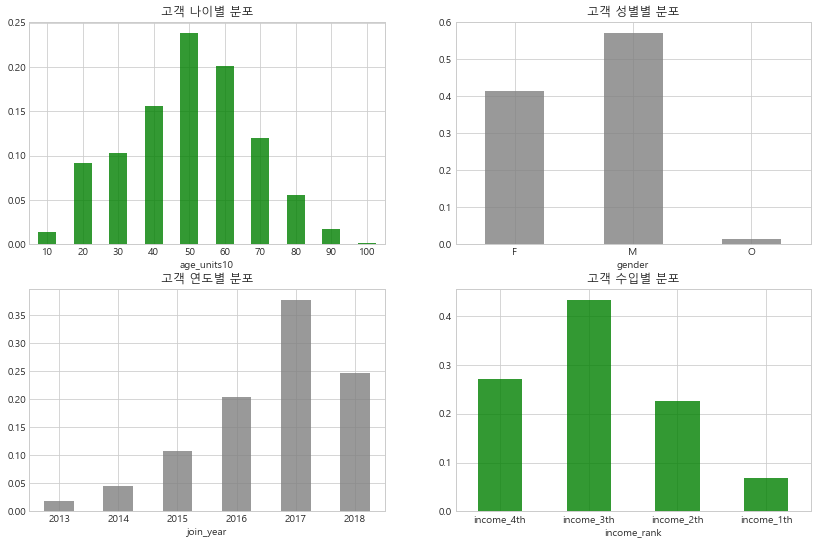

In [109]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,9))
(profile.groupby(by='age_units10').count()['person_id']/len(profile)).plot.bar(ax=axes[0][0], rot=0, title='고객 나이별 분포', color='g', alpha=0.8)
(profile.groupby(by='gender').count()['person_id']/len(profile)).plot.bar(ax=axes[0][1], rot=0, title='고객 성별별 분포', color = 'grey', alpha =0.8)
(profile.groupby(by='join_year').count()['person_id']/len(profile)).plot.bar(ax=axes[1][0], rot=0, title='고객 연도별 분포', color='grey', alpha=0.8)
(profile.groupby(by='income_rank').count()['person_id']/len(profile)).plot.bar(ax=axes[1][1], rot=0, title='고객 수입별 분포',  color='g', alpha=0.8)

In [110]:
display(profile.head(3))
final2.head(3)

,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,income_rank
0,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,income_1th
1,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,income_2th
2,M,68,e2127556f4,2018-04-26,70000.0,60,65,2018,4,26,2021-07-26,1187,income_3th


,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea,reward,channels,difficulty,duration,offer_type,email,web,mobile,social,channel_num,r_minus_d,income_rank
0,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,transaction,18,NaN,NaN,amount,21.51,0,0,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,income_1th
1,F,58,fcb6487bac,2017-03-10,71000.0,50,55,2017,3,10,2021-07-26,1599,transaction,594,NaN,24.75,amount,21.51,24,3,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,income_3th
2,F,56,0f792a0ea8,2016-02-14,70000.0,50,55,2016,2,14,2021-07-26,1989,transaction,594,NaN,24.75,amount,21.51,24,3,오후6시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,income_3th


[2차원 분석]

* 같은 성별 집단 내에서 여성고객이 남성고객보다 소득 구간이 높은 구간에 있는 비율이 높았다.

<AxesSubplot:xlabel='gender'>

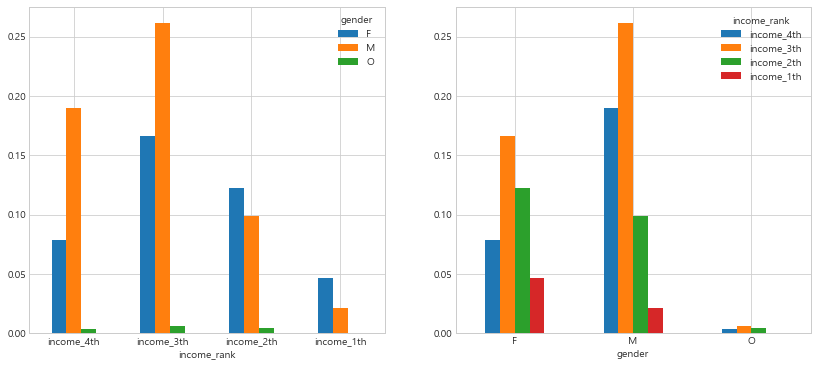

In [111]:
fig, axes = plt.subplots(ncols=2, figsize=(14,6))
(profile.groupby(by=['gender', 'income_rank']).count()['person_id'].unstack('gender')/len(profile)).plot.bar(ax= axes[0], rot=0)
(profile.groupby(by=['gender', 'income_rank']).count()['person_id'].unstack('income_rank')/len(profile)).plot.bar(ax=axes[1], rot=0)


* 시간이 지날수록 새로가입한 고객 중 남성 고객의 비율이 증가하고 있다.

<AxesSubplot:xlabel='gender'>

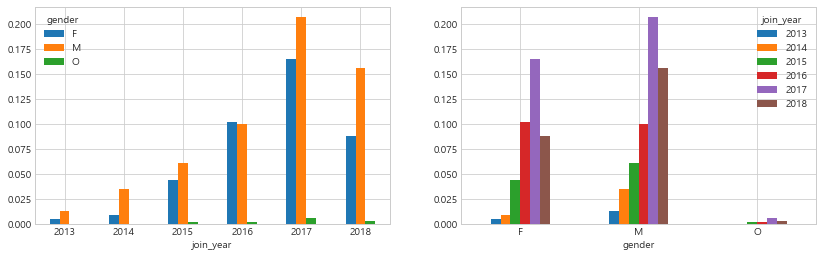

In [112]:
fig, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
(profile.groupby(by=['gender', 'join_year']).count()['person_id'].unstack('gender')/len(profile)).plot.bar(ax= axes1[0], rot=0)
(profile.groupby(by=['gender', 'join_year']).count()['person_id'].unstack('join_year')/len(profile)).plot.bar(ax= axes1[1], rot=0)

<AxesSubplot:xlabel='join_year'>

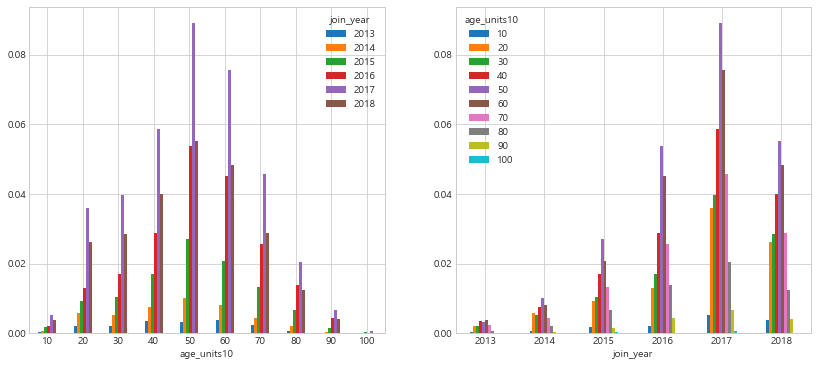

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
(profile.groupby(by=['join_year', 'age_units10']).count()['person_id'].unstack('join_year')/len(profile)).plot.bar(ax=axes[0], rot=0)
(profile.groupby(by=['join_year', 'age_units10']).count()['person_id'].unstack('age_units10')/len(profile)).plot.bar(ax=axes[1], rot=0)


### 주력 고객층 선정

#### 고객 거래 데이터중 transaction 부분을 활용하여 거래 총 금액이 큰 주력 고객층을 선정해보자

In [114]:
final.sample(3)

,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea,reward,channels,difficulty,duration,offer_type,email,web,mobile,social,channel_num,r_minus_d
228796,F,23,daa056c77f,2016-04-29,44000.0,20,20,2016,4,29,2021-07-26,1914,transaction,120,NaN,5.00,amount,9.93,5,0,자정,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3803,F,25,cf4ca217c4,2016-11-17,64000.0,20,25,2016,11,17,2021-07-26,1712,offer completed,450,NaN,18.75,offer id,9b98b8c7a3,18,2,오후6시,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0
77416,F,58,37ce604e20,2017-08-19,77000.0,50,55,2017,8,19,2021-07-26,1437,offer completed,696,NaN,29.00,offer id,2906b810c7,29,4,자정,2.0,"['web', 'email', 'mobile']",10.0,7.0,discount,1.0,1.0,1.0,0.0,3.0,-8.0


**필요한 컬럼 쇼핑**

In [115]:
cols = ['gender', 'age', 'person_id', 'age_units10', 'join_year', 'event', 'group', 'offer_id']
transaction = final[cols].copy()

In [116]:
## 고객 결제 총금액 구하는 부분
transaction = transaction[transaction['group']=='amount']
transaction = transaction.astype({'offer_id':float})
transaction_amount = transaction.groupby(by='person_id').sum()[['offer_id']]

## 고객 데이터와 merge
customer_buy = pd.merge(profile, transaction_amount, left_on = 'person_id', right_index=True)
customer_buy = customer_buy.rename(columns ={'offer_id' : 'total_buy'})
customer_buy.head(4)

,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,income_rank,total_buy
0,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,income_1th,77.01
1,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,income_2th,159.27
2,M,68,e2127556f4,2018-04-26,70000.0,60,65,2018,4,26,2021-07-26,1187,income_3th,57.73
3,M,65,389bc3fa69,2018-02-09,53000.0,60,65,2018,2,9,2021-07-26,1263,income_3th,36.43


In [119]:
customer_buy.to_csv('checkpoint_csv/customer_buy.csv', index=0)

In [120]:
pd.read_csv('checkpoint_csv/customer_buy.csv')

,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,income_rank,total_buy
0,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,income_1th,77.01
1,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,income_2th,159.27
2,M,68,e2127556f4,2018-04-26,70000.0,60,65,2018,4,26,2021-07-26,1187,income_3th,57.73
3,M,65,389bc3fa69,2018-02-09,53000.0,60,65,2018,2,9,2021-07-26,1263,income_3th,36.43
4,M,58,2eeac8d8fe,2017-11-11,51000.0,50,55,2017,11,11,2021-07-26,1353,income_3th,15.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14486,F,45,6d5f3a774f,2018-06-04,54000.0,40,45,2018,6,4,2021-07-26,1148,income_3th,20.03
14487,M,61,2cb4f97358,2018-07-13,72000.0,60,60,2018,7,13,2021-07-26,1109,income_3th,25.97
14488,M,49,01d26f638c,2017-01-26,73000.0,40,45,2017,1,26,2021-07-26,1642,income_3th,39.74
14489,F,83,9dc1421481,2016-03-07,50000.0,80,80,2016,3,7,2021-07-26,1967,income_4th,189.67


In [121]:
total_buy = customer_buy['total_buy'].sum()

* 50대 ~ 60대의 고객들이 전체 고객중 44%를 차지하며 가장 많은 비율을 차지하고 있다.
* 50대  ~ 60대의 고객들이 전체 매출의 47.9%를 차지하고 있다.

**인원수 비율**

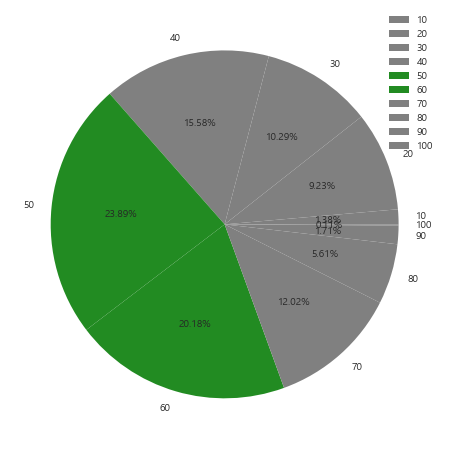

In [122]:
pie_profile = profile.groupby(by='age_units10').count()['person_id']/len(profile)
plt.figure(figsize =(8, 8));
plt.pie(pie_profile, labels=pie_profile.index, autopct = '%0.2f%%', 
        colors = ['Gray', 'Gray', 'Gray', 'Gray', 
                  'ForestGreen', 'ForestGreen', 'Gray', 'Gray', 'Gray', 'Gray']);
plt.legend(pie_profile.index);

**매출 비율**

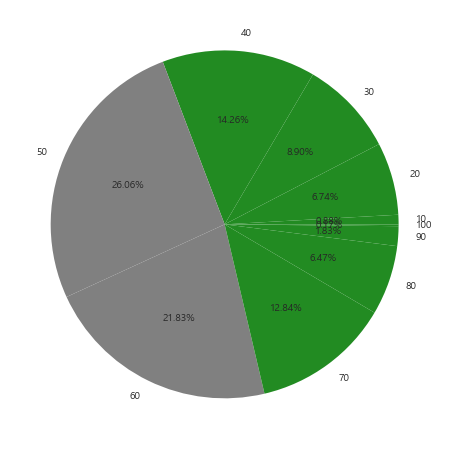

In [123]:
pie_buy = customer_buy.groupby(by='age_units10').sum()['total_buy']/total_buy

plt.figure(figsize =(8, 8));
plt.pie(pie_buy, labels=pie_profile.index, autopct = '%0.2f%%',
        colors = ['ForestGreen', 'ForestGreen','ForestGreen', 'ForestGreen', 
                  'Gray', 'Gray', 'ForestGreen', 'ForestGreen', 'ForestGreen', 'ForestGreen']);
# plt.legend(pie_buy.index);

<AxesSubplot:title={'center':'고객 나이별 분포'}, xlabel='age_units10'>

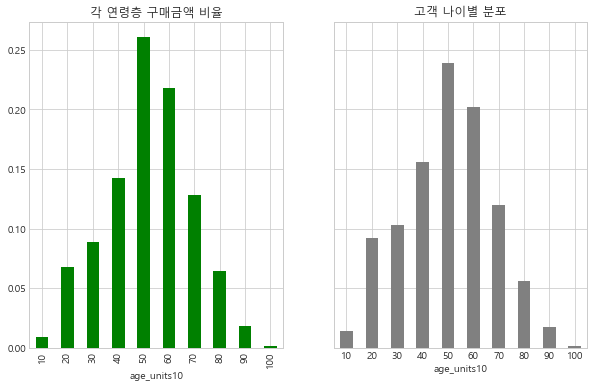

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True)
(customer_buy.groupby(by='age_units10').sum()['total_buy']/total_buy).plot.bar(ax=axes[0], title='각 연령층 구매금액 비율', color='green')
(profile.groupby(by='age_units10').count()['person_id']/len(profile)).plot.bar(ax=axes[1], rot=0, color='grey', title='고객 나이별 분포')

* 여성이 남성보다 분포는 적은데 더 많은 금액을 쓰는 것을 볼 수 있다. 즉, 남성보다 여성이 돈을 더 많이 쓴다.
    
    -> 성별로 타켓을 잡는다면 여성을 주력 고객으로 잡는 것이 좋다.

<AxesSubplot:title={'center':'고객 성별별 분포'}, xlabel='gender'>

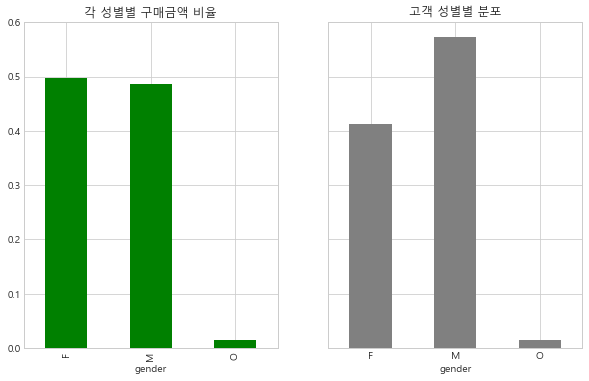

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True)
(customer_buy.groupby(by='gender').sum()['total_buy']/total_buy).plot.bar(ax=axes[0], color='green', title='각 성별별 구매금액 비율')
(profile.groupby(by='gender').count()['person_id']/len(profile)).plot.bar(ax=axes[1], rot=0, color='grey', title='고객 성별별 분포')

* 50대 여성, 60대 여성이 비율에 비해 큰 금액을 지출하고 있는 것을 알 수 있다.

<AxesSubplot:title={'center':'고객 성별별 분포'}, xlabel='age_units10'>

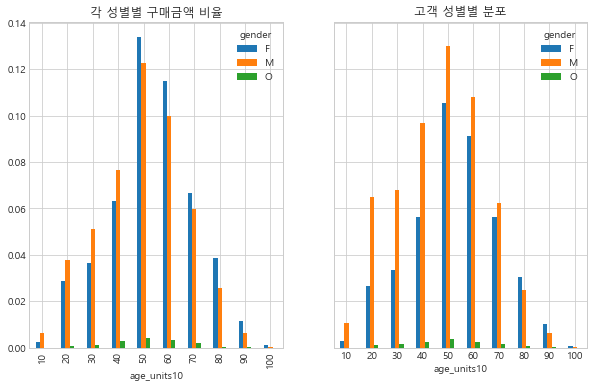

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True)
(customer_buy.groupby(by=['gender', 'age_units10']).sum()['total_buy'].unstack('gender')/total_buy).plot.bar(ax=axes[0], title='각 성별별 구매금액 비율')
(profile.groupby(by=['gender', 'age_units10']).count()['person_id'].unstack('gender')/len(profile)).plot.bar(ax=axes[1], rot=0, title='고객 성별별 분포')

In [127]:
# display(customer_buy.groupby(by=['gender', 'age_units10']).sum()['total_buy'].unstack('gender')/total_buy)
# display(profile.groupby(by=['gender', 'age_units10']).count()['person_id'].unstack('gender')/len(profile))
print('50, 60대 여성 총 매출 비율 :', 0.133753 + 0.114888)
print('50, 60대 여성 총 인원 비율 :', 0.105228 + 0.091062)

50, 60대 여성 총 매출 비율 : 0.248641
50, 60대 여성 총 인원 비율 : 0.19629000000000002


#### (결론) 주력 고객층 선정

* 50대 ~60대의 고객들이 전체 고객중 44%를 차지하며 가장 많은 비율을 차지하고 있고, 전체 매출의 47.9%를 차지하고 있다.
* 여성이 남성보다 더 큰 금액을 소비하고 있는 모습을 보여준다.
* 주력 고객층 선정
    - 대집단 : 전체 고객중 44%를 차지하며 47.9%의 매출을 올리고 있는 **50대, 60대 고객**을 스타벅스의 주력 고객으로 선정하자.
    - 소집단 : 전체 고객 중 19.6% 차지하며 24.8%의 매출을 올리고 있는 **50대, 60대 여성**을 주력고객으로 지정하자.
        * 향후에 프로모션 타케팅을 진행할때, 소집단과 대집단이 동일하면 좋겠다. 

**아래**
* 아래 그림은 income rank 별로 전체 소비에서 각 그룹이 차지하는 소비 비율(왼쪽)
* income rank별로 전체 소비에서 각 그룹이 차지하는 인원 비율(오른쪽)을 살펴 본 것이다.

* income rank가 높을 수록 소비 금액이 큰 것을 알 수 있다.

<AxesSubplot:title={'center':'각 수입 집단 별 인원수'}, xlabel='income_rank'>

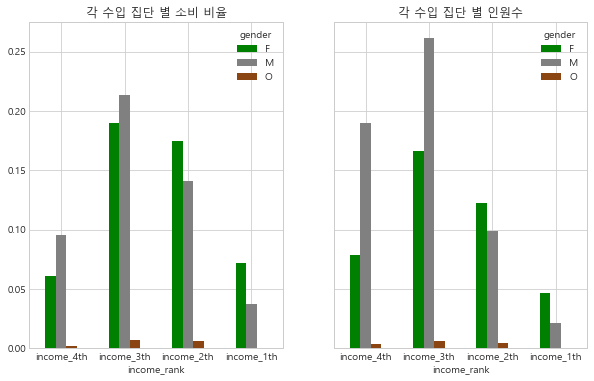

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True)
(customer_buy.groupby(by=['income_rank', 'gender']).sum()['total_buy'].unstack('gender')/total_buy).plot.bar(ax=axes[0], rot=0, 
                                                                                                             title = '각 수입 집단 별 소비 비율',color=['green', 'gray', 'saddlebrown'])
(profile.groupby(by=['income_rank', 'gender']).count()['person_id'].unstack('gender')/len(profile)).plot.bar(ax=axes[1], rot=0, 
                                                                                                             title='각 수입 집단 별 인원수', color=['green', 'gray', 'saddlebrown'])

#### 각 집단별  인원 비율 대비 구매 금액 비율

   * (각 집단의 구매 총금액/전체 집단 구매 총금액) / (각 집단의 인원 수/ 전체 인원수 )
   * 전반적으로 나이대가 높고, 소득구간이 높은 고객들이 소비금액이 컸다.

<AxesSubplot:xlabel='age_units10', ylabel='income_rank-gender'>

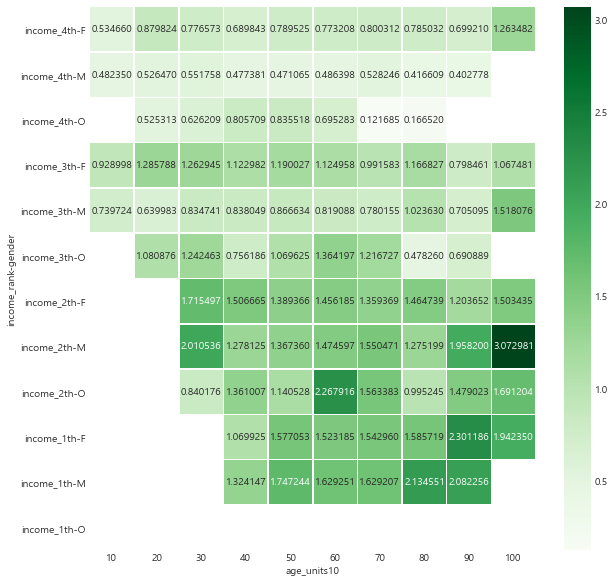

In [129]:
## 각 집단별 구매 금액 비율
buy_ratio_table = customer_buy.groupby(by=['income_rank', 'gender', 'age_units10']).sum()['total_buy'].unstack('age_units10')/total_buy
## 각 집단별 인원수 비율
people_ratio_table = profile.groupby(by=['income_rank', 'gender', 'age_units10' ]).count()['person_id'].unstack('age_units10')/len(profile)
## 각 집단별 인원수 대비 구매 금액.
ratio = buy_ratio_table/people_ratio_table

plt.figure(figsize=(10, 10))
sns.heatmap(ratio,
           cmap='Greens', annot=True, fmt='f', linewidths=0.5)

## 향후 프로모션 전략 제안

**고객 거래 데이터중 promotion 부분을 활용하여 어떤 프로모션이 매력적인지 파악해보고, 프로모션에 잘 참여하는 고객층을 파악해보자.**

### 총 순 수익 관점에서 우수한 프로모션
**어떤 프로모션이 `총 순 수익`관점에서 우수한가?**

In [130]:
promotion = final2[final2['group']!='amount'].copy()

In [131]:
promotion

,gender,age,person_id,became_member_on,income,age_units10,age_units5,join_year,join_month,join_day,now,join_period,event,time,Unnamed: 5,Unnamed: 6,group,offer_id,day,week,time_korea,reward,channels,difficulty,duration,offer_type,email,web,mobile,social,channel_num,r_minus_d,income_rank
40,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,offer completed,528,NaN,22.00,offer id,9b98b8c7a3,22,3,자정,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0,income_1th
41,F,55,0610b48642,2017-07-15,112000.0,50,55,2017,7,15,2021-07-26,1472,offer received,408,NaN,17.00,offer id,9b98b8c7a3,17,2,자정,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0,income_1th
42,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,offer received,0,NaN,NaN,offer id,9b98b8c7a3,0,0,자정,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0,income_2th
43,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,offer viewed,6,NaN,NaN,offer id,9b98b8c7a3,0,0,오전6시,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0,income_2th
44,F,75,78afa99579,2017-05-09,100000.0,70,75,2017,5,9,2021-07-26,1539,offer completed,132,NaN,5.50,offer id,9b98b8c7a3,5,0,정오,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0,3.0,0.0,income_2th
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149552,F,45,6d5f3a774f,2018-06-04,54000.0,40,45,2018,6,4,2021-07-26,1148,offer received,336,NaN,14.00,offer id,4d5c57ea9a,14,2,자정,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,1.0,1.0,1.0,1.0,4.0,0.0,income_3th
149553,F,45,6d5f3a774f,2018-06-04,54000.0,40,45,2018,6,4,2021-07-26,1148,offer viewed,402,NaN,16.75,offer id,4d5c57ea9a,16,2,오후6시,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,1.0,1.0,1.0,1.0,4.0,0.0,income_3th
149554,F,83,9dc1421481,2016-03-07,50000.0,80,80,2016,3,7,2021-07-26,1967,offer received,336,NaN,14.00,offer id,4d5c57ea9a,14,2,자정,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,1.0,1.0,1.0,1.0,4.0,0.0,income_4th
149555,F,83,9dc1421481,2016-03-07,50000.0,80,80,2016,3,7,2021-07-26,1967,offer viewed,342,NaN,14.25,offer id,4d5c57ea9a,14,2,오전6시,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,1.0,1.0,1.0,1.0,4.0,0.0,income_4th


In [132]:
cols = ['gender', 'age', 'person_id', 'age_units10', 'join_year', 'event', 'group', 'offer_id', 'reward', 'difficulty', 'r_minus_d', 'duration', 'offer_type']
promotion= promotion[cols].copy()
promotion.sample(3)

,gender,age,person_id,age_units10,join_year,event,group,offer_id,reward,difficulty,r_minus_d,duration,offer_type
93379,M,60,b29fe4d821,60,2014,offer received,offer id,fafdcd668e,2.0,10.0,-8.0,10.0,discount
136421,F,57,ab14726489,50,2016,offer viewed,offer id,4d5c57ea9a,10.0,10.0,0.0,5.0,bogo
39868,M,19,adc7ef85f1,10,2016,offer received,offer id,ae264e3637,10.0,10.0,0.0,7.0,bogo


* event
    - **`offer received`** : difficulty를 지불하고 bogo 쿠폰 및 할인권을 지급받음
    - **`offer completed`** : 쿠폰 및 할인권을 사용함.(reward)를 받음.
    - **`offer view`** : 이 정보는 분석에 제외한다.

* offer_type
    - **`informational`** : 정보성 프로모션, 총 순수익과 관련이 없으므로 제거한다.


* profit(순이익) : difficulty - reward

* **`total_difficulty(총 이익)`** = **`difficulty * offer_received`**
* **`total_reward(총 지출)`** = **`total_reward * offer_completed`**
* **`total_profit(총 순이익)`** = **`total_difficulty - total_reward`** = **`(difficulty * offer_received) - (total_reward * offer_completed)`**

<AxesSubplot:xlabel='offer_id,offer_type'>

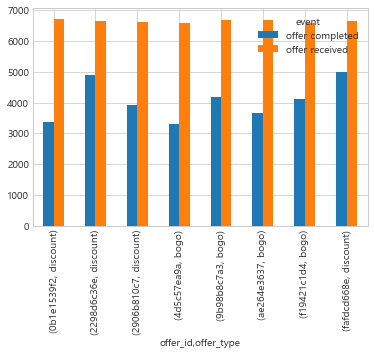

In [133]:
promotion = promotion[promotion['offer_type']!='informational']
promotion = promotion[promotion['event']!='offer viewed']
promotion['event'].value_counts()
promotion.groupby(by=['offer_id','offer_type', 'event']).count()['person_id'].unstack('event').plot.bar()

**offer received와 offer completed로 나누기**

In [134]:
promotion_received  = promotion[promotion['event']=='offer received']
promotion_completed  = promotion[promotion['event']=='offer completed']

In [135]:
total_difficulty = promotion_received.groupby(by=['offer_id']).sum()['difficulty']
total_reward = promotion_completed.groupby(by=['offer_id']).sum()['reward']

total = pd.DataFrame([total_difficulty, total_reward]).T
total.columns = ['total_difficulty', 'total_reward']
total['total_profit'] = total['total_difficulty'] - total['total_reward']

**portfoilo 데이터와 병합**

* **completed_count** : 쿠폰을 사용당한 숫자
* **received_count** : 쿠폰을 지급한 숫자
* **completed_ratio(%)** : 쿠폰을 받고, 쿠폰을 사용한 비율 

In [136]:
result = pd.merge(portfolio, total, left_on='offer_id', right_index=True)
result = result[['offer_id', 'offer_type', 'difficulty', 'reward', 'total_difficulty', 'total_reward', 'total_profit', 'duration']]

result['receive_count'] = result['total_difficulty']/result['difficulty']
result['completed_count'] = result['total_reward']/result['reward']
result['completed_ratio(%)'] = (result['completed_count']/result['receive_count']*100).round(2)
result_sort = result.sort_values('total_profit', ascending=False).set_index(['offer_id', 'offer_type'])
result_sort

,,difficulty,reward,total_difficulty,total_reward,total_profit,duration,receive_count,completed_count,completed_ratio(%)
offer_id,offer_type,,,,,,,,,
0b1e1539f2,discount,20,5,134520.0,16930.0,117590.0,10,6726.0,3386.0,50.34
2906b810c7,discount,10,2,66300.0,7820.0,58480.0,7,6630.0,3910.0,58.97
fafdcd668e,discount,10,2,66510.0,10004.0,56506.0,10,6651.0,5002.0,75.21
4d5c57ea9a,bogo,10,10,65930.0,33100.0,32830.0,5,6593.0,3310.0,50.20
2298d6c36e,discount,7,3,46585.0,14658.0,31927.0,7,6655.0,4886.0,73.42
ae264e3637,bogo,10,10,66820.0,36560.0,30260.0,7,6682.0,3656.0,54.71
9b98b8c7a3,bogo,5,5,33420.0,20940.0,12480.0,7,6684.0,4188.0,62.66
f19421c1d4,bogo,5,5,32880.0,20515.0,12365.0,5,6576.0,4103.0,62.39


In [137]:
result_sort.to_csv('result_sort.csv')

In [138]:
pd.read_csv('result_sort.csv')

,offer_id,offer_type,difficulty,reward,total_difficulty,total_reward,total_profit,duration,receive_count,completed_count,completed_ratio(%)
0,0b1e1539f2,discount,20,5,134520.0,16930.0,117590.0,10,6726.0,3386.0,50.34
1,2906b810c7,discount,10,2,66300.0,7820.0,58480.0,7,6630.0,3910.0,58.97
2,fafdcd668e,discount,10,2,66510.0,10004.0,56506.0,10,6651.0,5002.0,75.21
3,4d5c57ea9a,bogo,10,10,65930.0,33100.0,32830.0,5,6593.0,3310.0,50.20
4,2298d6c36e,discount,7,3,46585.0,14658.0,31927.0,7,6655.0,4886.0,73.42
5,ae264e3637,bogo,10,10,66820.0,36560.0,30260.0,7,6682.0,3656.0,54.71
6,9b98b8c7a3,bogo,5,5,33420.0,20940.0,12480.0,7,6684.0,4188.0,62.66
7,f19421c1d4,bogo,5,5,32880.0,20515.0,12365.0,5,6576.0,4103.0,62.39


#### (결론) 총 순수익이 우수한 프로모션

* 각 프로모션을 참여(received)된 횟수는 비슷하다. 하지만 실제 쿠폰을 사용한 것은 discount가 더 많다. 
* bogo 전략보다, discount 전략이 총 수익 관점에서 좋다.

<AxesSubplot:title={'center':'쿠폰 사용 비율'}, xlabel='offer_id,offer_type'>

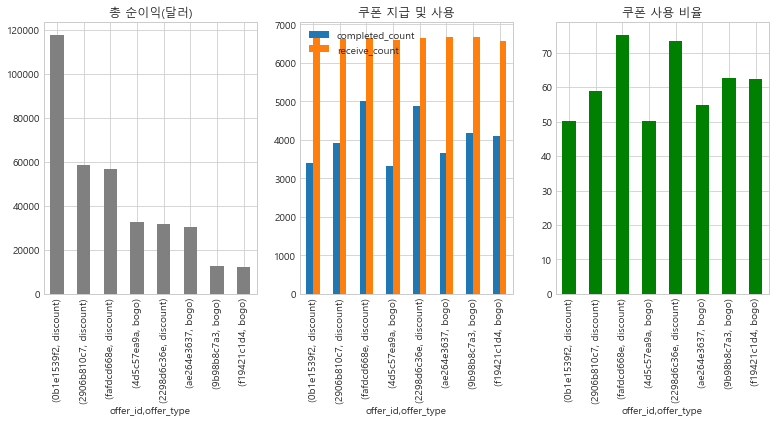

In [139]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))

result_sort['total_profit'].plot.bar(ax= axes[0], title ='총 순이익(달러)', color ='grey')
result_sort[['completed_count', 'receive_count']].plot.bar(ax= axes[1], title ='쿠폰 지급 및 사용')
result_sort['completed_ratio(%)'].plot.bar(ax= axes[2], title ='쿠폰 사용 비율', color ='green')

* reward가 클 수록 completed_ratio가 감소하는 경향을 보였다. (상관관계 -0.69)
* 0b1e1539f2이 프로모션이 총 수익 관점에서 좋다.
    - 각 프로모션의 참여 빈도가 비슷하며, difficulty가 큼과 동시에 reward 사용 빈도가 적은 것이 total profit에 일조한 것으로 보인다.

#### 총 수익 관점에서 프로모션 제안 
* 총 수익 관점에서 향후 프로모션을 진행할 때 discount전략을 사용하고, reward를 증가시키더라도 difficulty를 높히는 프로모션을 추천한다.

<AxesSubplot:>

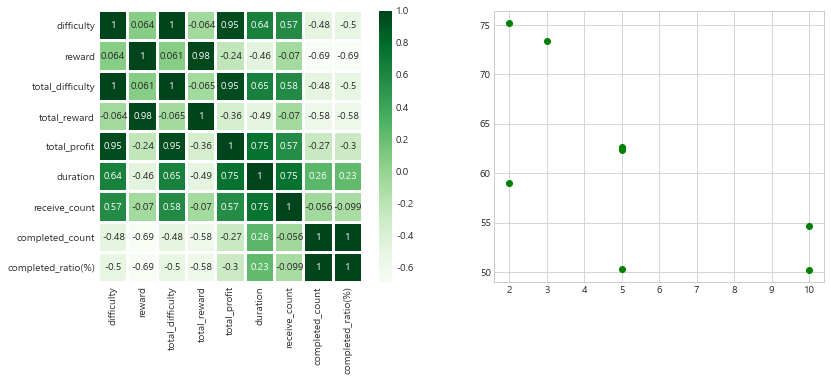

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
axes[1] = plt.scatter(x=result_sort['reward'], y = result_sort['completed_ratio(%)'], color ='g')
sns.heatmap(result_sort.corr(),cmap='Greens', ax=axes[0], annot=True, linewidths=2)


<AxesSubplot:>

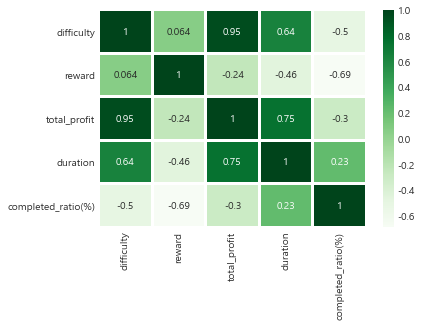

In [141]:
sns.heatmap(result_sort[['difficulty','reward', 'total_profit', 'duration','completed_ratio(%)']].corr(),cmap='Greens', annot=True, linewidths=2)

### 주력 고객층이 선호하는 프로모션 전략을 파악해보자

* 주력 고객층 선정
    - 대집단 : 전체 고객중 44%를 차지하며 47.9%의 매출을 올리고 있는 **50대, 60대 고객**을 스타벅스의 주력 고객으로 선정하자.
    - 소집단 : 전체 고객 중 19.6% 차지하며 24.8%의 매출을 올리고 있는 **50대, 60대 여성**을 주력고객으로 지정하자.

**소집단 : 전체 고객 중 19.6% 차지하며 24.8%의 매출을 올리고 있는 `50대, 60대 여성`을 주력고객으로 지정하자.**

In [142]:
female = (promotion['gender']=='F')
age_50_60 = (promotion['age_units10'].isin([50, 60]))

small_group = promotion.loc[female&age_50_60]
f_50_60 = small_group.groupby(by=['offer_id','event']).count()['person_id'].unstack('event')
f_50_60.style.background_gradient(cmap ='Greens', subset='offer received')

event,offer completed,offer received
offer_id,,
0b1e1539f2,858,1335
2298d6c36e,1049,1281
2906b810c7,912,1295
4d5c57ea9a,843,1265
9b98b8c7a3,949,1296
ae264e3637,908,1285
f19421c1d4,917,1281
fafdcd668e,1130,1357


In [144]:
f_50_60.to_csv('checkpoint_csv/f_50_60.csv')

In [145]:
pd.read_csv('checkpoint_csv/f_50_60.csv')

,offer_id,offer completed,offer received
0,0b1e1539f2,858,1335
1,2298d6c36e,1049,1281
2,2906b810c7,912,1295
3,4d5c57ea9a,843,1265
4,9b98b8c7a3,949,1296
5,ae264e3637,908,1285
6,f19421c1d4,917,1281
7,fafdcd668e,1130,1357


#### (소집단 : 결론) 주력고객(50대 ~ 60대 여성)은 모든 프로모션에 골고루 참여하지만, 그나마 선호하는 프로모션은 discount 프로모션(fafdcd668e, 0b1e1539f2)이다.

In [146]:
cols = ['offer_id', 'offer_type', 'difficulty', 'reward', 'duration']
result = pd.merge(portfolio[cols], f_50_60, left_on = 'offer_id', right_index=True).sort_values(by = 'offer received', ascending=False)
result.style.background_gradient(cmap ='Greens', subset='offer received')

,offer_id,offer_type,difficulty,reward,duration,offer completed,offer received
6,fafdcd668e,discount,10,2,10,1130,1357
4,0b1e1539f2,discount,20,5,10,858,1335
3,9b98b8c7a3,bogo,5,5,7,949,1296
9,2906b810c7,discount,10,2,7,912,1295
0,ae264e3637,bogo,10,10,7,908,1285
5,2298d6c36e,discount,7,3,7,1049,1281
8,f19421c1d4,bogo,5,5,5,917,1281
1,4d5c57ea9a,bogo,10,10,5,843,1265


**대집단 : 전체 고객중 44%를 차지하며 47.9%의 매출을 올리고 있는 `50대, 60대 고객`을 스타벅스의 주력 고객으로 선정하자.**

In [147]:
age_50_60 = (promotion['age_units10'].isin([50, 60]))

big_group = promotion.loc[age_50_60]
age_50_60 = big_group.groupby(by=['offer_id','event']).count()['person_id'].unstack('event')
age_50_60.style.background_gradient(cmap ='Greens', subset='offer received')

event,offer completed,offer received
offer_id,,
0b1e1539f2,1645,2986
2298d6c36e,2166,2905
2906b810c7,1882,2942
4d5c57ea9a,1597,2886
9b98b8c7a3,1918,2959
ae264e3637,1753,2935
f19421c1d4,1906,2889
fafdcd668e,2316,2966


In [149]:
age_50_60.to_csv('checkpoint_csv/age_50_60.csv')
pd.read_csv ('checkpoint_csv/age_50_60.csv')

,offer_id,offer completed,offer received
0,0b1e1539f2,1645,2986
1,2298d6c36e,2166,2905
2,2906b810c7,1882,2942
3,4d5c57ea9a,1597,2886
4,9b98b8c7a3,1918,2959
5,ae264e3637,1753,2935
6,f19421c1d4,1906,2889
7,fafdcd668e,2316,2966


In [150]:
cols = ['offer_id', 'offer_type', 'difficulty', 'reward', 'duration']
result = pd.merge(portfolio[cols], age_50_60, left_on = 'offer_id', right_index=True).sort_values(by = 'offer received', ascending=False)
result.style.background_gradient(cmap ='Greens', subset='offer received')

,offer_id,offer_type,difficulty,reward,duration,offer completed,offer received
4,0b1e1539f2,discount,20,5,10,1645,2986
6,fafdcd668e,discount,10,2,10,2316,2966
3,9b98b8c7a3,bogo,5,5,7,1918,2959
9,2906b810c7,discount,10,2,7,1882,2942
0,ae264e3637,bogo,10,10,7,1753,2935
5,2298d6c36e,discount,7,3,7,2166,2905
8,f19421c1d4,bogo,5,5,5,1906,2889
1,4d5c57ea9a,bogo,10,10,5,1597,2886


#### (대집단 : 결론) 주력고객(50대 ~ 60대)은 모든 프로모션에 골고루 참여하지만, 그나마 선호하는 프로모션은 discount 프로모션(fafdcd668e, 0b1e1539f2)이다.

#### 주력 고객층은 대집단, 소집단 모두 discount프로모션을 선호하고 그중에 fafdcd668e, 0b1e1539f2 이 프로모션을 공통적으로 선호하는 모습을 보였다. 총 순수익에 영향력을 강하게 행사하는 주력 고객을 위해서 위 프로모션을 추천한다.

------------------
### 신규고객이 선호하는 프로모션 전략을 파악해보자

* **2018년도의 가입한 고객**을 **`신규고객`** 이라고 지정하고. `신규고객`을 유치하기 위해서 프로모션 전략을 반영한다고 할 때. **`신규고객`**이 자주 참여하는 프로모션 전략을 파악해서. 향후에 그 프로모션 전략을 취한다.

#### (주제 정당화 조건) 가입일자가 고객의 프로모션 참여, 거래 빈도에 영향을 주는가?

**가입일자(join_year)별 event 응답 횟수**

In [151]:
B = final2.copy()
result_B = B.groupby(by=['join_year', 'event'])['offer_id'].count().unstack()[['transaction', 'offer received', 'offer completed']]
display(result_B)

event,transaction,offer received,offer completed
join_year,,,
2013,3408,1226,561
2014,8178,2968,1318
2015,17574,7150,4319
2016,31167,13520,8928
2017,44081,25125,12119
2018,19544,16507,5196


**연도별 가입자수**

In [152]:
join_year = B.groupby(by=['join_year'])[['offer_id']].nunique()
display(join_year)

,offer_id
join_year,
2013,1369
2014,2034
2015,3641
2016,4144
2017,4284
2018,3466


**연도별 가입자들의 평균 응답 수**

In [153]:
## 각 연도별 거래 빈도를 각 연도별 가입자 수로 나눠준다.
arr_result_B = np.array(result_B)
arr_join_day = np.array(join_year)
arr_div = arr_result_B / arr_join_day

result_div = result_B.copy()

for i in range(result_div.shape[0]) :
    for j in range(result_div.shape[1]) :
        result_div.iloc[i, j] = arr_div[i, j]
result_div['total'] = result_div.sum(axis=1)
result_div

event,transaction,offer received,offer completed,total
join_year,,,,
2013,2.489408,0.895544,0.409788,3.794741
2014,4.020649,1.459194,0.647984,6.127827
2015,4.826696,1.963746,1.186213,7.976655
2016,7.520994,3.262548,2.154440,12.937983
2017,10.289683,5.864846,2.828898,18.983427
2018,5.638777,4.762550,1.499134,11.900462


**시각화**

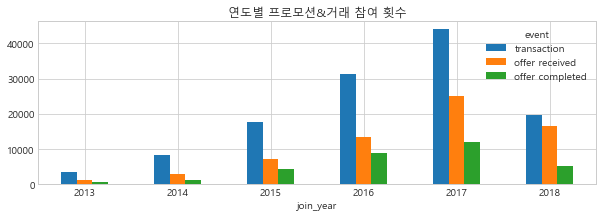

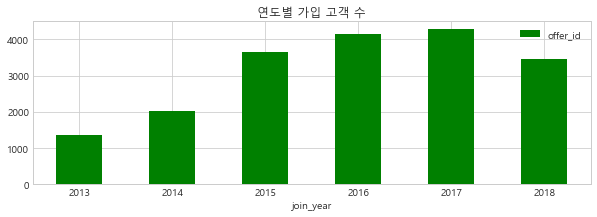

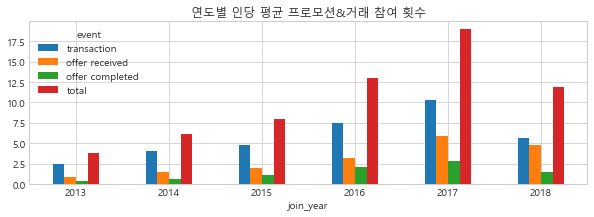

In [154]:
result_B.plot.bar(rot=0, title = '연도별 프로모션&거래 참여 횟수', figsize=(10, 3));
join_year.plot.bar(rot=0, color='green', title = '연도별 가입 고객 수', figsize=(10, 3));
result_div.plot.bar(rot=0,title='연도별 인당 평균 프로모션&거래 참여 횟수', figsize=(10,3));

#### (주제 정당화 조건 : 결론) 가입일자가 최근에 가까울 수록 거래 + 프로모션 참여 빈도가 높았다. 

   * 측정일자 2013년 7월 26일 ~ 2018년 7월 26일 

#### 신규 고객이 선호하는 프로모션 전략은 무었인가.

In [155]:
promotion_2018 = promotion[promotion['join_year']==2018]
group_2018 = promotion_2018.groupby(by = 'offer_id').count()[['person_id']]
group_2018 = group_2018.sort_values(by='person_id', ascending=False) 
group_2018.style.background_gradient(cmap ='Greens')

,person_id
offer_id,
fafdcd668e,2547
2298d6c36e,2516
9b98b8c7a3,2336
2906b810c7,2281
ae264e3637,2269
f19421c1d4,2260
0b1e1539f2,2225
4d5c57ea9a,2021


In [156]:
cols = ['offer_id', 'offer_type', 'difficulty', 'reward', 'duration']
result = pd.merge(portfolio[cols], group_2018, left_on = 'offer_id', right_index=True).sort_values(by = 'person_id', ascending=False)
result.style.background_gradient(cmap ='Greens', subset='person_id')

,offer_id,offer_type,difficulty,reward,duration,person_id
6,fafdcd668e,discount,10,2,10,2547
5,2298d6c36e,discount,7,3,7,2516
3,9b98b8c7a3,bogo,5,5,7,2336
9,2906b810c7,discount,10,2,7,2281
0,ae264e3637,bogo,10,10,7,2269
8,f19421c1d4,bogo,5,5,5,2260
4,0b1e1539f2,discount,20,5,10,2225
1,4d5c57ea9a,bogo,10,10,5,2021


#### (결론) 신규고객은 discount 프로모션을 선호하는 모습을 보여준다. (fafdcd668e[discount], 2298d6c36e[discount])이 두 프로모션을 선호한다.

## 분석 결론 : 전반적으로 BOGO보다 DISCOUNT가 더 좋다.

###  주력 고객층

* 50대 ~60대의 고객들이 전체 고객중 44%를 차지하며 가장 많은 비율을 차지하고 있고, 전체 매출의 47.9%를 차지하고 있다.
* 여성이 남성보다 더 큰 금액을 소비하고 있는 모습을 보여준다.
* 주력 고객층 선정
    - 대집단 : 전체 고객중 44%를 차지하며 47.9%의 매출을 올리고 있는 **50대, 60대 고객**을 스타벅스의 주력 고객으로 선정하자.
    - 소집단 : 전체 고객 중 19.6% 차지하며 24.8%의 매출을 올리고 있는 **50대, 60대 여성**을 주력고객으로 지정하자.

### 총 순 수익 관점에서 우수한 프로모션

* 각 프로모션을 참여(received)된 횟수는 비슷하다. 하지만 실제 쿠폰을 사용한 것은 discount가 더 많다. 
* bogo 전략보다, discount 전략이 총 수익 관점에서 좋다.

* reward가 클 수록 completed_ratio가 감소하는 경향을 보였다. (상관관계 -0.69)
* **`0b1e1539f2[discount]`**이 프로모션이 총 수익 관점에서 좋다.
    - 각 프로모션의 참여 빈도가 비슷하며, difficulty가 큼과 동시에 reward 사용 빈도가 적은 것이 total profit에 일조한 것으로 보인다.
* 총 수익 관점에서 향후 프로모션을 진행할 때 discount전략을 사용하고, reward를 증가시키더라도 difficulty를 높히는 프로모션을 추천한다.


###  주력 고객층이 선호하는 프로모션
* 주력 고객층은 대집단, 소집단 모두 discount프로모션을 선호하고 그중에 **`fafdcd668e[discount]`**, **`0b1e1539f2[discount]`** 이 프로모션을 공통적으로 선호하는 모습을 보였다.
* 총 순수익에 영향력을 강하게 행사하는 주력 고객을 위해서 위 프로모션을 추천한다.

### 신규 고객층이 선호하는 프로모션
* 신규고객은 discount 프로모션을 선호하는 모습을 보여준다. (**`fafdcd668e[discount]`**, **`2298d6c36e[discount]`**)이 두 프로모션을 선호한다.
* 거래 빈도가 평균보다 높은 신규 고객층을 확보하기 위해서 신규 고객층이 선호하는 위 두가지의 discount 전략을 진행한다. 

--------------------------------------------
# 가설 검정

## 남성과 여성의 평균 소비금액이 다른가?

### 가설 설정
* **귀무가설** : 남성과 여성의 평균 소비금액은 차이가 없다.
* **대립가설** : 남성과 여성의 평균 소비금액에 차이가 있다.

### 가설 검정 
* **독립표본 T 검정**
    - 두 독립적인 표본의 평균에 대한 차이를 검정

* **등분산 검정**
    - var.test() -> `p-value < 0.05` : 두 표본의 분산이 다르다.

* **이분산 독립표본 검정**
    - welch's T test -> `p-value < 0.05` : 대립가설 채택

### 결론
* **남성과 여성의 평균 소비금액에 차이가 존재한다.**

## 여성의 연령 별 평균 소비금액이 다른가?

### 가설 설정
* **귀무가설** : 연령 별 평균 소비금액은 같다.
* **대립가설** : 연령 별 평균 소비금액은 다르다.

### 가설 검정 
* **ANOVA 검정**
    - 10대의 평균 소비금액은 너무나도 명확히 차이나서 제외
    - 100대의 경우 표본의 크기가 14로 중심극한정리를 따르지 않고, 정규성을 만족하지 않아서 제외.

* **등분산 검정**
    - bartlett.test -> `p-value < 0.05` : 두 표본의 분산이 다르다.
    - ANOVA를 사용할 수 없다.
    
* **Kruskal-walis test**
    - Kruskal-walis test -> `p-value < 0.05` : 대립가설 채택
    - **연령 별 평균 소비금액은 다르다.**
    
### 사후 검정

* **Wilcoxson ranksum test**
   * bonferonni correction 으로 p-value를 보정
   * 8개의 표본을 2개씩 검정(28개의 경우의수)
   * 보정 된 p-value = 0.00178
   
   * **분석 결론 : `50대와 60대의 평균 소비금액이 가장 높다`**
   
   * **사후 검정** : 20~40 대와의 검정에서 p-value가 0.00178보다 낮으므로 대립가설을 채택하고, 70대 ~ 90대 와의 검정에서는 0.00178보다 높은 p-value를 얻으므로 귀무가설을 채택한다.
    
### 결론
* **주 고객층 50 ~ 60대 여성은 20 ~ 40대 여성과의 평균 소비금액의 차이가 유의미하지만, 70~90대와의 차이는 유의미하지 않다.**

## 주력 고객층(소집단), 50대 ~ 60대 여성 고객은 특정 프로모션에 더 많이 참여가는가?

### 가설 설정
* **귀무가설** : 프로모션 참여 분포는 같다
* **대립가설** : 특정 프로모션에 대한 더 큰 참여가 있다.

### 가설 검정 
* **카이제곱 검정**
    - 8개의 프로모션에 대하여 균일 분포(각 프로모션 참여 확률 : 0.125)를 가정한다.
    - 0.125의 균일분포를 따르는지 검정.
    - `p-value > 0.05` : 귀무가설 채택
    
### 결론
* 50대 ~ 60대 여성의 프로모션 참여 분포는 같고 특정 프로모션에 대한 선호도는 없다.

## 주력 고객층(대집단) 50~60대 고객은 특정 프로모션에 더 많이 참여하는가?

### 가설 설정
* **귀무가설** : 프로모션 참여 분포는 같다.
* **대립가설** : 특정 프로모션에 대한 더 큰 참여가 있다.

### 가설 검정 
* **카이제곱 검정**
    - 8개의 프로모션에 대하여 균일 분포(각 프로모션 참여 확률 : 0.125)를 가정한다.
    - 0.125의 균일분포를 따르는지 검정.
    - `p-value > 0.05` : 귀무가설 채택
    
### 결론
* 50대 ~ 60대 고객의 프로모션 참여 분포는 같고 특정 프로모션에 대한 선호도는 없다.

## 신규 고객은 특정 프로모션에 더 많이 참여하는가?

### 가설 설정
* **귀무가설** : 프로모션 참여 분포는 같다.
* **대립가설** : 특정 프로모션에 대한 더 큰 참여가 있다.

### 가설 검정 
* **카이제곱 검정**
    - 8개의 프로모션에 대하여 균일 분포(각 프로모션 참여 확률 : 0.125)를 가정한다.
    - 0.125의 균일분포를 따르는지 검정.
    - `p-value < 0.05` : 귀무가설 채택
    
### 결론
* 신규고객들은 특정 프로모션에 대한 선호도가 존재한다.

# 최종 결론

+ **남성 고객이 여성 고객보다 많지만, 소비 금액은 여성 고객이 더 많다.**

+ **그 중 50대 이상 여성 고객이 주력 고객층이다.**

+ **주력 고객층이 특별하게 선호하는 프로모션은 없다. 따라서 수익성이 좋은 discount가 좋은 프로모션이다.**

+ **신규 고객은 프로모션 참여나 거래 빈도 측면에서 주요한 고객층이고 이들은 discount 프로모션을 특히 선호한다**